### 1. Data 
#### 1.1 insert category
#### 1.2 Graphs by category
     1.2.1 category 별 비디오 수
     1.2.2 국가별 category
     1.2.3 category 별 국가
     1.2.4 category 와 view_count의 상관관계
     1.2.5 category 와 likes의 상관관계
     1.2.6 category 와 dislike의 상관관계
     1.2.7 category 와 commment_count의 상관관계
### 2. Heatmap
### 3. DATASET
#### 3.1 dataset collection 
     3.1.1 dataset collection by year
     3.1.2 dataset collection by week
     3.1.3 dataset collection by hour
### 4. Tags
#### 4.1 capitalized word
     4.1.1 tag_count 와 like 의 상관관계
     4.1.2 tag_count와 dislike 의 상관관계
     4.1.3 tag_count와 comment_count 와의 상관관계
     4.1.4 tag_count와 view_count의 상관관계
### 5. View_count, likes, dislikes, comment_count 
#### 5.1 HEATMAP
     5.1.1 view_count and likes 상관관계
     5.1.2 view_count and dislikes 상관관계
     5.1.3 likes and dislikes 상관관계
     5.1.4 view_count and comment_count 상관관계
     5.1.5 likes and comment_count 상관관계
     5.1.6 dislikes and comment_count 상관관계
### 6. Title_length
#### 6.1 title length 와 상관관계
     6.1.1 title length vs Numbers of video
     6.1.2 title_length and likes 상관관계
     6.1.3 title_length and views 상관관계
     6.1.4 title length and dislikes 상관관계
### 7. Data Cleaning
### 8. Machine Learning
#### 8.1. Linear Regression
#### 8.2 XGBRegressor
#### 8.3 LGBMRegressor
#### 8.4 Random Forest Classifier


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
import time
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import json

from wordcloud import WordCloud
from wordcloud import WordCloud
from collections import Counter
from konlpy.tag import Okt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import r2_score



## 1. DATA

In [3]:
datas = ['BR', 'CA', 'DE', 'FR', 'GB', 'IN', 'US', 'KR']

dfs = []
for csv in datas:
    
    df = pd.read_csv(f'/Users/gihyunyeo/Documents/데이터사이언티스트/ML/ML_project/project_1/2020_youtube/{csv}_youtube_trending_data.csv', index_col='video_id')
    df['country'] = csv
    dfs.append(df)



youtube_df = pd.concat(dfs)
youtube_df.tail(3)

,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,country
video_id,,,,,,,,,,,,,,,,
OcE_DzYE_AM,소울리스좌 본캐 김한나,2022-04-27T09:00:11Z,UCILgj-Cl3aneZBoK3l_gasw,티타남,23,2022-05-09T00:00:00Z,에버랜드|티타남|아마존|티익스프레스|아마존익스프레스|알바|어트랙션|직원|에버랜드직원...,856516,9644,0,1088,https://i.ytimg.com/vi/OcE_DzYE_AM/default.jpg,False,False,귀한 분 모시고 인터뷰 나눠보았습니다.쿠키영상에 거대한 떡밥이 투척되는데..?***...,KR
kJvdtMeI-bk,[덕메이트] 손석구씨 그런 표정으로 챙겨주지 마요 자꾸 그럼 아내 대기표 뽑는다( ...,2022-04-28T11:21:51Z,UCKuwp52MjSk-zeFRpchSheg,DRAMA Voyage,24,2022-05-09T00:00:00Z,genre:가족|format:큐레이션|type:방송|series:나의해방일지|top...,335764,4550,0,361,https://i.ytimg.com/vi/kJvdtMeI-bk/default.jpg,False,False,[ 과몰입 포인트 가이드｜덕메이트 ] 손석구씨가 츤데레의 교과서라는 게 정설.반박 ...,KR
JPaubSOSxeM,오늘 수정이네 집에서 자고 가려고,2022-04-23T09:00:07Z,UCXEKwWflysXu312NmIP_dlw,너덜트,23,2022-05-09T00:00:00Z,[None],4350503,83338,0,3922,https://i.ytimg.com/vi/JPaubSOSxeM/default.jpg,False,False,#코믹숏무비 #nerdult #외박부모님 속이고 외박할 때장소 협찬 : 퍼핀스베이 ...,KR


In [4]:
youtube_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1014831 entries, s9FH4rDMvds to JPaubSOSxeM
Data columns (total 16 columns):
 #   Column             Non-Null Count    Dtype 
---  ------             --------------    ----- 
 0   title              1014831 non-null  object
 1   publishedAt        1014831 non-null  object
 2   channelId          1014831 non-null  object
 3   channelTitle       1014830 non-null  object
 4   categoryId         1014831 non-null  int64 
 5   trending_date      1014831 non-null  object
 6   tags               1014831 non-null  object
 7   view_count         1014831 non-null  int64 
 8   likes              1014831 non-null  int64 
 9   dislikes           1014831 non-null  int64 
 10  comment_count      1014831 non-null  int64 
 11  thumbnail_link     1014831 non-null  object
 12  comments_disabled  1014831 non-null  bool  
 13  ratings_disabled   1014831 non-null  bool  
 14  description        978458 non-null   object
 15  country            1014831 non-null  obj

In [5]:
print(youtube_df.shape)

(1014831, 16)


In [6]:
youtube_df.isnull().sum()

title                    0
publishedAt              0
channelId                0
channelTitle             1
categoryId               0
trending_date            0
tags                     0
view_count               0
likes                    0
dislikes                 0
comment_count            0
thumbnail_link           0
comments_disabled        0
ratings_disabled         0
description          36373
country                  0
dtype: int64

In [7]:
youtube_df['description'] = youtube_df['description'].fillna("")
youtube_df.isnull().sum()

title                0
publishedAt          0
channelId            0
channelTitle         1
categoryId           0
trending_date        0
tags                 0
view_count           0
likes                0
dislikes             0
comment_count        0
thumbnail_link       0
comments_disabled    0
ratings_disabled     0
description          0
country              0
dtype: int64

In [8]:
# 영상제목과 채널명이 둘 다 중복인 영상 제거
youtube_data = youtube_df.drop_duplicates(['title','channelTitle'], keep='first')

youtube_data.head(3)

,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,country
video_id,,,,,,,,,,,,,,,,
s9FH4rDMvds,LEVEI UM FORA? FINGI ESTAR APAIXONADO POR ELA!,2020-08-11T22:21:49Z,UCGfBwrCoi9ZJjKiUK8MmJNw,Pietro Guedes,22,2020-08-12T00:00:00Z,pietro|guedes|ingrid|ohara|pingrid|vlog|amigos...,263835,85095,487,4500,https://i.ytimg.com/vi/s9FH4rDMvds/default.jpg,False,False,"Salve rapaziada, neste vídeo me declarei pra e...",BR
jbGRowa5tIk,ITZY “Not Shy” M/V TEASER,2020-08-11T15:00:13Z,UCaO6TYtlC8U5ttz62hTrZgg,JYP Entertainment,10,2020-08-12T00:00:00Z,JYP Entertainment|JYP|ITZY|있지|ITZY Video|ITZY ...,6000070,714310,15176,31040,https://i.ytimg.com/vi/jbGRowa5tIk/default.jpg,False,False,ITZY Not Shy M/V[ITZY Official] https://www.yo...,BR
3EfkCrXKZNs,Oh Juliana PARÓDIA - MC Niack,2020-08-10T14:59:00Z,UCoXZmVma073v5G1cW82UKkA,As Irmãs Mota,22,2020-08-12T00:00:00Z,OH JULIANA PARÓDIA|MC Niack PARÓDIA|PARÓDIAS|A...,2296748,39761,5484,0,https://i.ytimg.com/vi/3EfkCrXKZNs/default.jpg,True,False,Se inscrevam meus amores! 📬 Quer nos mandar al...,BR


In [9]:
print(youtube_data.isnull().values.any())

True


In [10]:
youtube = youtube_data.dropna(how='any',axis=0)

In [11]:
youtube.describe()

,categoryId,view_count,likes,dislikes,comment_count
count,156080.000000,1.560800e+05,1.560800e+05,1.560800e+05,1.560800e+05
mean,19.928678,7.827831e+05,4.930941e+04,8.154310e+02,3.213539e+03
std,6.305476,2.129470e+06,1.398561e+05,1.121282e+04,2.081711e+04
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,1.279125e+05,5.869750e+03,1.900000e+01,3.060000e+02
50%,22.000000,3.064325e+05,1.493400e+04,1.440000e+02,8.190000e+02
75%,24.000000,7.650162e+05,4.143300e+04,5.160000e+02,2.227000e+03
max,29.000000,1.696265e+08,7.110651e+06,3.979409e+06,3.400697e+06


### 1.1 insert category



In [12]:
youtube['categoryId'] = youtube['categoryId'].astype(str)


categoryId = {}

with open('/Users/gihyunyeo/Documents/데이터사이언티스트/ML/ML_project/project_1/2020_youtube/US_category_id.json', 'r') as f:
    data = json.load(f)
    for category in data['items']:
        categoryId[category['id']] = category['snippet']['title']

youtube.insert(4, 'category', youtube['categoryId'].map(categoryId))
category_list = youtube['category'].unique()
category_list

array(['People & Blogs', 'Music', 'Gaming', 'Comedy', 'Sports',
       'Entertainment', 'Education', 'Autos & Vehicles', 'Howto & Style',
       'News & Politics', 'Science & Technology', 'Film & Animation',
       'Travel & Events', 'Pets & Animals', 'Nonprofits & Activism'],
      dtype=object)

False    154126
True       1954
Name: comments_disabled, dtype: int64


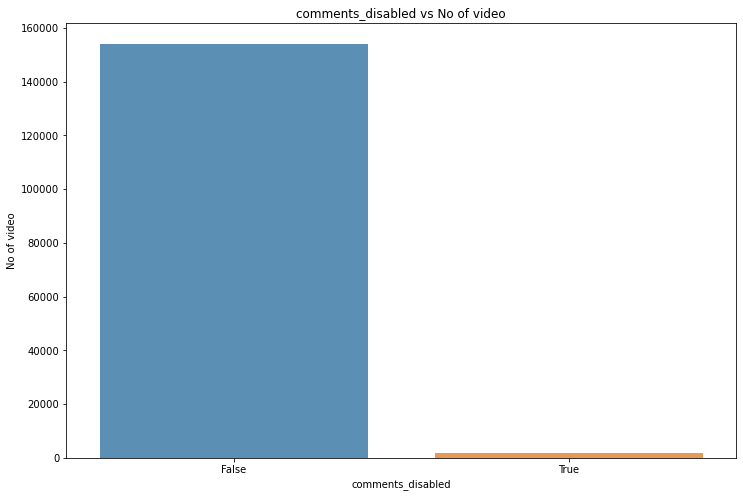

False    154728
True       1352
Name: ratings_disabled, dtype: int64


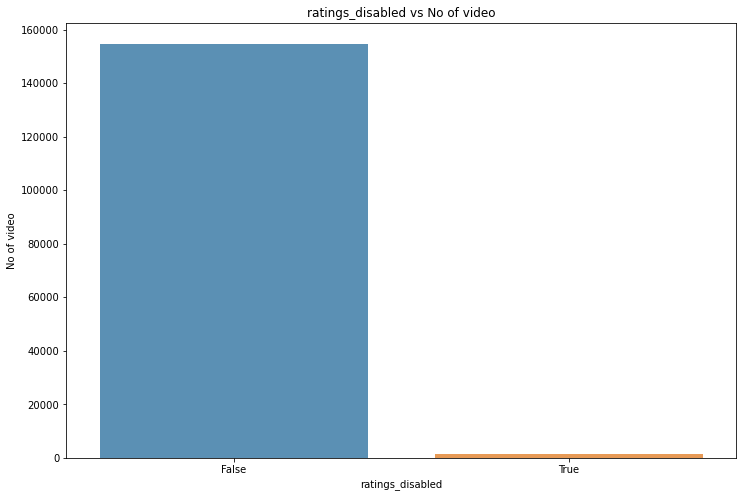

In [13]:
for x in (['comments_disabled','ratings_disabled']):
    count=youtube[x].value_counts()
    print(count)
    plt.figure(figsize=(12,8))
    sns.barplot(count.index, count.values, alpha=0.8)
    plt.title('{} vs No of video'.format(x))
    plt.ylabel('No of video')
    plt.xlabel('{}'.format(x))
    plt.show()

### 1.2 Graphs by category

#### 1.2.1 category 별 비디오 수

Entertainment            46814
Music                    20769
People & Blogs           18233
Sports                   18064
Gaming                   14854
Comedy                    9424
News & Politics           6196
Howto & Style             5308
Science & Technology      4297
Education                 3686
Autos & Vehicles          3337
Film & Animation          3182
Travel & Events           1068
Pets & Animals             735
Nonprofits & Activism      113
Name: category, dtype: int64


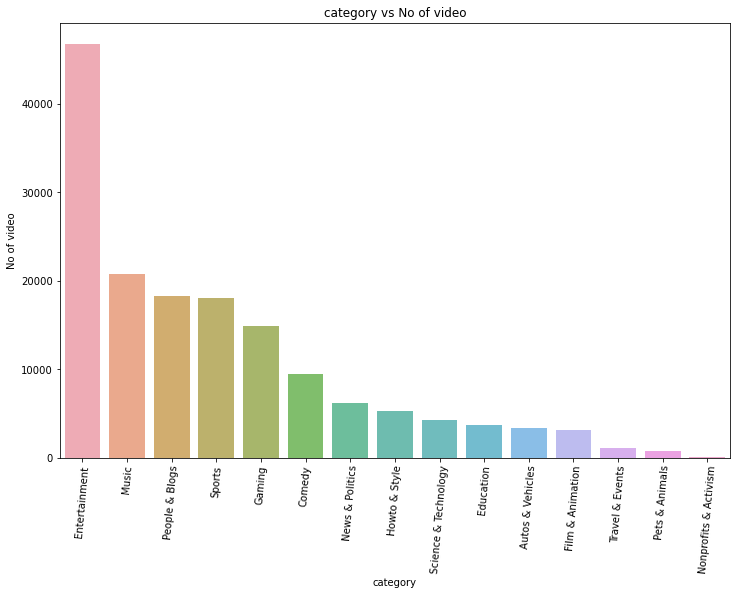

In [14]:
for x in ['category']:
    count=youtube[x].value_counts()
    print(count)
    plt.figure(figsize=(12,8))
    sns.barplot(count.index, count.values, alpha=0.8)
    plt.title('{} vs No of video'.format(x))
    plt.ylabel('No of video')
    plt.xlabel('{}'.format(x))
    plt.xticks(rotation=85)
    plt.show()

### 1.2.2 국가별 category

Text(0, 0.5, 'Y axis label')

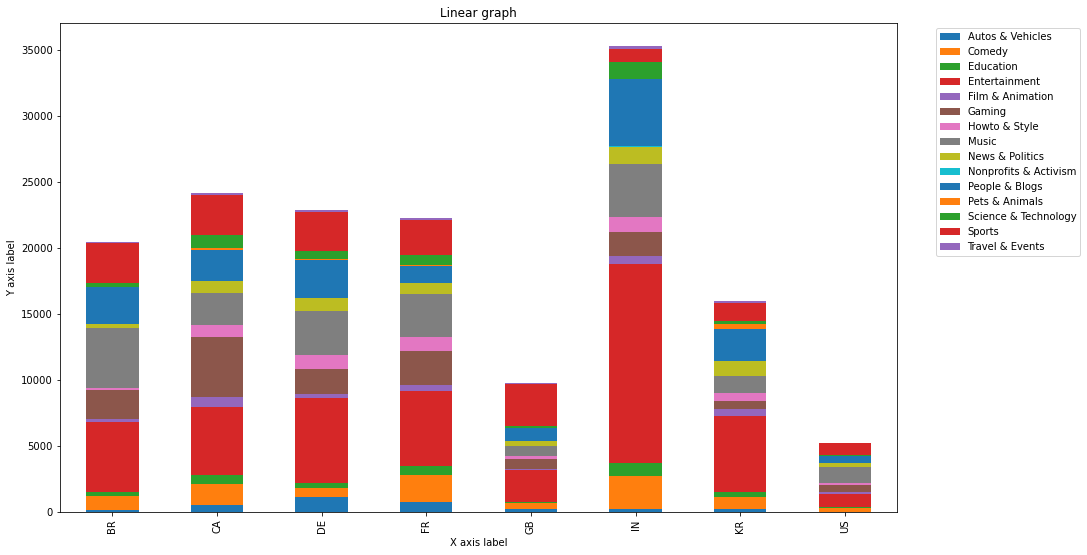

In [15]:
Figure2 = youtube.groupby('category')['country'].value_counts().unstack(0).plot.bar(stacked=True, figsize=(15,9))
#figure.legend(loc='upper left')
Figure2.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.title("Linear graph")
plt.xlabel("X axis label")
plt.ylabel("Y axis label")

### 1.2.3 category 별 국가

Text(0, 0.5, 'Y axis label')

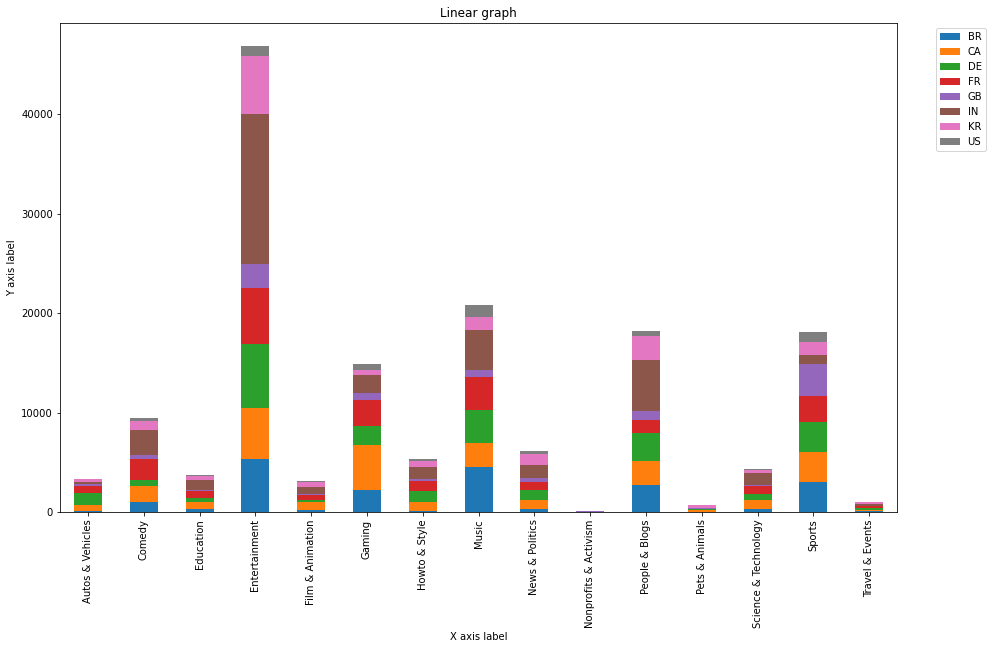

In [16]:
figure3 =youtube.groupby('category')['country'].value_counts().unstack(1).plot.bar(stacked=True, figsize=(15,9))
#figure.legend(loc='upper left')
figure3.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.title("Linear graph")
plt.xlabel("X axis label")
plt.ylabel("Y axis label")

### 1.2.4 category 와 view_count의 상관관계

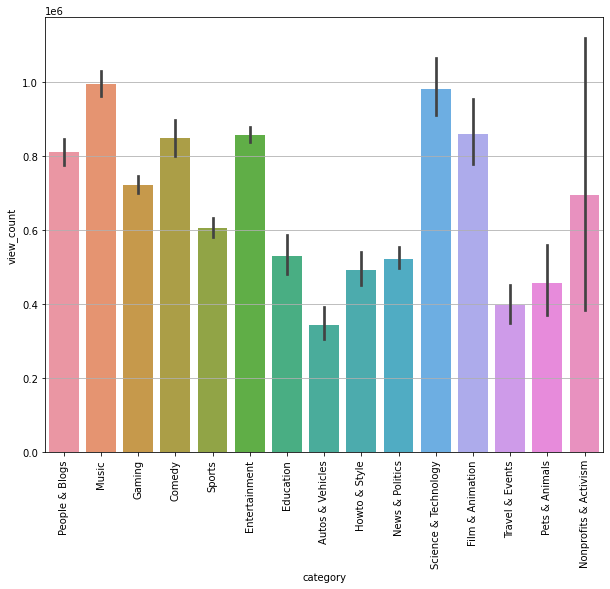

In [17]:
youtube['view_count']
plt.figure(figsize=(10, 8))
plt.grid()
sns.barplot(y = youtube['view_count'],x = youtube['category'])
plt.xlabel('category')
plt.ylabel('view_count')
plt.xticks(rotation=90)
plt.show()

### 1.2.5 category 와 likes의 상관관계

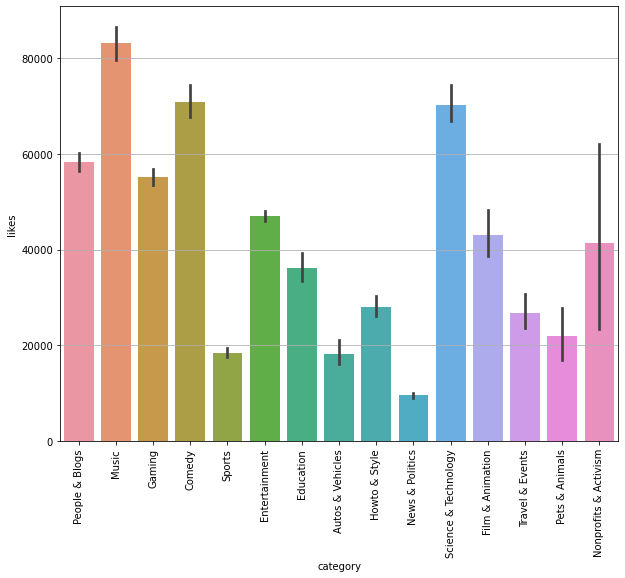

In [18]:
youtube['view_count']
plt.figure(figsize=(10, 8))
plt.grid()
sns.barplot(y = youtube['likes'],x = youtube['category'])
plt.xlabel('category')
plt.ylabel('likes')
plt.xticks(rotation=90)
plt.show()

### 1.2.6 category 와 dislike의 상관관계

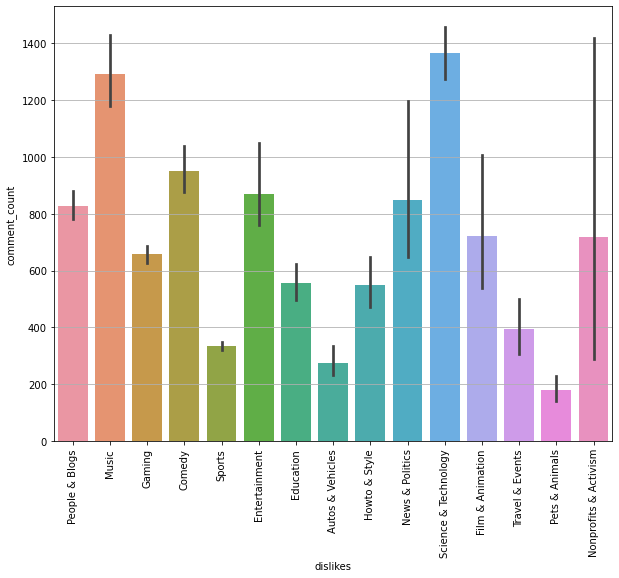

In [19]:
youtube['view_count']
plt.figure(figsize=(10, 8))
plt.grid()
sns.barplot(y = youtube['dislikes'],x = youtube['category'])
plt.xlabel('dislikes')
plt.ylabel('comment_count')
plt.xticks(rotation=90)
plt.show()

### 1.2.7 category 와 commment_count의 상관관계

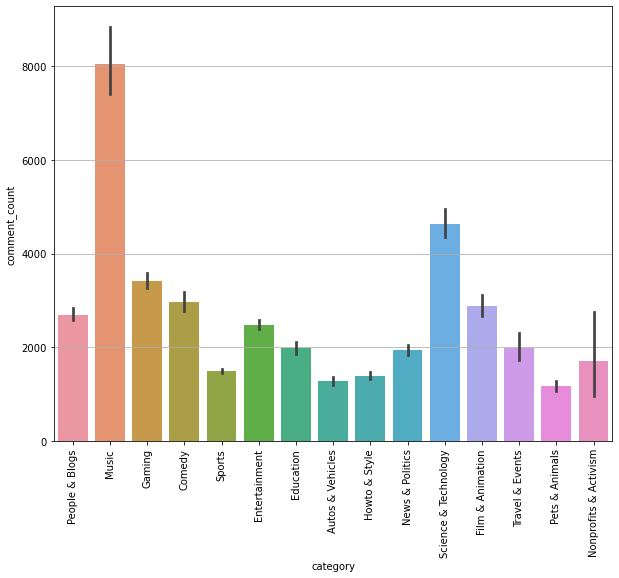

In [20]:
youtube['view_count']
plt.figure(figsize=(10, 8))
plt.grid()
sns.barplot(y = youtube['comment_count'],x = youtube['category'])
plt.xlabel('category')
plt.ylabel('comment_count')
plt.xticks(rotation=90)
plt.show()

## 2. heatmap

In [21]:
youtube.corr()

,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled
view_count,1.000000,0.743622,0.186914,0.340579,-0.002732,-0.002101
likes,0.743622,1.000000,0.149667,0.573809,-0.023053,-0.032957
dislikes,0.186914,0.149667,1.000000,0.143653,0.003996,-0.006798
comment_count,0.340579,0.573809,0.143653,1.000000,-0.017382,-0.006383
comments_disabled,-0.002732,-0.023053,0.003996,-0.017382,1.000000,0.082750
ratings_disabled,-0.002101,-0.032957,-0.006798,-0.006383,0.082750,1.000000


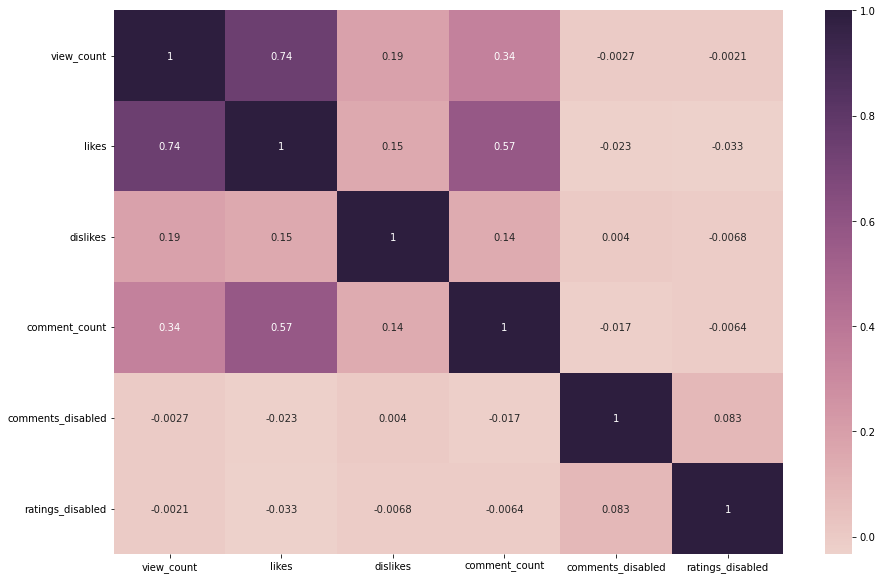

In [22]:
plt.figure(figsize=(15,10))
sns.heatmap(youtube.corr(), cmap=sns.cubehelix_palette(as_cmap=True), annot=True)
plt.show()

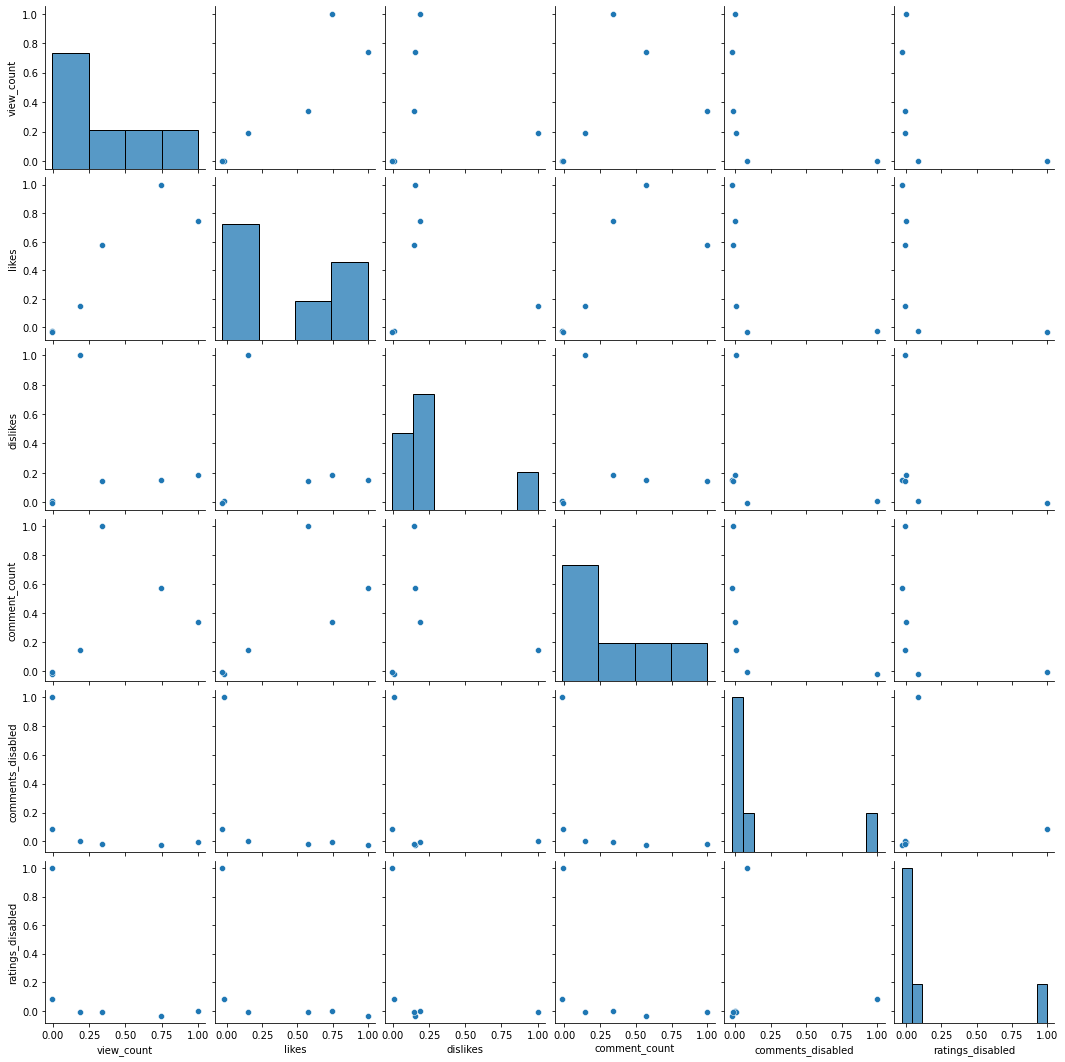

In [23]:
sns.pairplot(youtube.corr())
plt.show()

## 3. DATASET

### 3.1 dataset collection
#### 3.1.1 dataset collection by year

In [24]:
youtube['year'] = youtube['trending_date'].apply(lambda x : '20'+ x[:2])
youtube['year']

video_id
s9FH4rDMvds    2020
jbGRowa5tIk    2020
3EfkCrXKZNs    2020
gBjox7vn3-g    2020
npoUGx7UW7o    2020
               ... 
14ldT35NK4U    2020
TwPWzPuKF5I    2020
4fSoC_QX8Xk    2020
Xeukv1oYlHM    2020
R2DJhuELV2Y    2020
Name: year, Length: 156080, dtype: object

In [25]:
my_dict=(youtube['year'].value_counts()).to_dict()
my_dict

{'2020': 156080}

### 3.1.2 dataset collection by week

In [26]:
youtube['publishedAt'] = pd.to_datetime(youtube['publishedAt'].apply(lambda x: x[:19]))
youtube.head(3)

,title,publishedAt,channelId,channelTitle,category,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,country,year
video_id,,,,,,,,,,,,,,,,,,
s9FH4rDMvds,LEVEI UM FORA? FINGI ESTAR APAIXONADO POR ELA!,2020-08-11 22:21:49,UCGfBwrCoi9ZJjKiUK8MmJNw,Pietro Guedes,People & Blogs,22,2020-08-12T00:00:00Z,pietro|guedes|ingrid|ohara|pingrid|vlog|amigos...,263835,85095,487,4500,https://i.ytimg.com/vi/s9FH4rDMvds/default.jpg,False,False,"Salve rapaziada, neste vídeo me declarei pra e...",BR,2020
jbGRowa5tIk,ITZY “Not Shy” M/V TEASER,2020-08-11 15:00:13,UCaO6TYtlC8U5ttz62hTrZgg,JYP Entertainment,Music,10,2020-08-12T00:00:00Z,JYP Entertainment|JYP|ITZY|있지|ITZY Video|ITZY ...,6000070,714310,15176,31040,https://i.ytimg.com/vi/jbGRowa5tIk/default.jpg,False,False,ITZY Not Shy M/V[ITZY Official] https://www.yo...,BR,2020
3EfkCrXKZNs,Oh Juliana PARÓDIA - MC Niack,2020-08-10 14:59:00,UCoXZmVma073v5G1cW82UKkA,As Irmãs Mota,People & Blogs,22,2020-08-12T00:00:00Z,OH JULIANA PARÓDIA|MC Niack PARÓDIA|PARÓDIAS|A...,2296748,39761,5484,0,https://i.ytimg.com/vi/3EfkCrXKZNs/default.jpg,True,False,Se inscrevam meus amores! 📬 Quer nos mandar al...,BR,2020


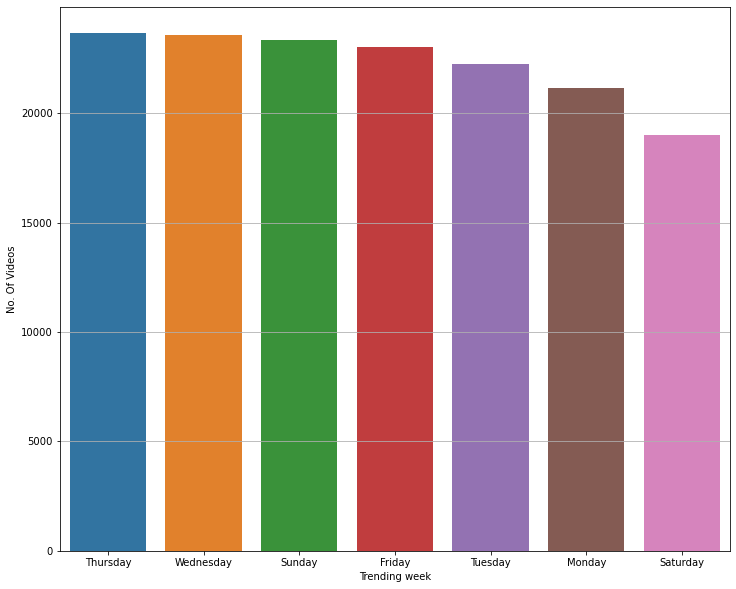

In [27]:
week = youtube['publishedAt'].dt.day_name()
my_dict = week.value_counts().to_dict()

count = pd.DataFrame(list(my_dict.items()),columns= ['Trending week','No. Of Videos'])

fig = plt.figure(figsize=(12,10))

plt.grid()
sns.barplot(x='Trending week', y='No. Of Videos', data=count);

#### 3.1.3 Dataset collection by hour

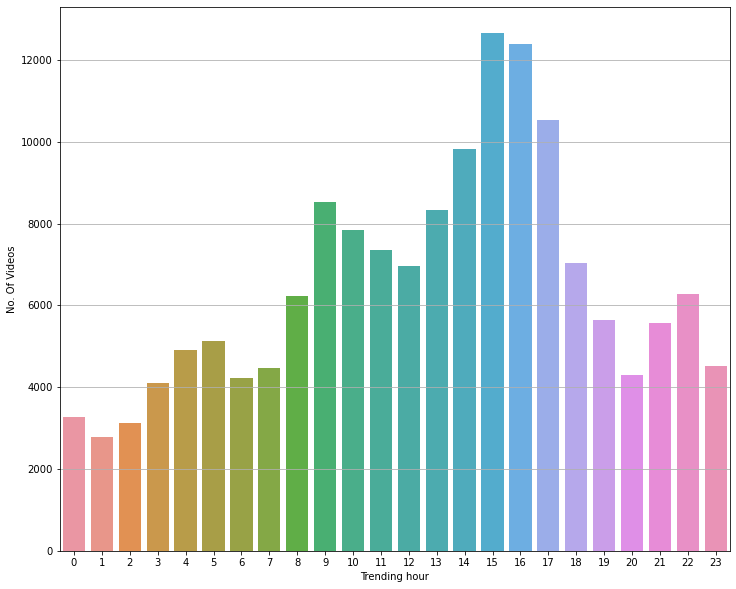

In [28]:
hour = youtube['publishedAt'].dt.hour
my_dict = hour.value_counts().to_dict()

count = pd.DataFrame(list(my_dict.items()),columns= ['Trending hour','No. Of Videos'])

fig = plt.figure(figsize=(12,10))

plt.grid()
sns.barplot(x='Trending hour', y='No. Of Videos', data=count);

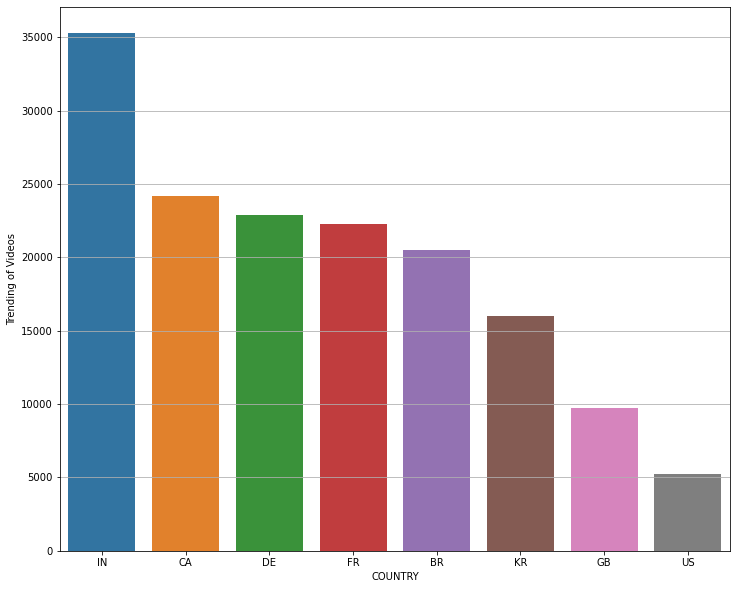

In [29]:
my_dict = youtube['country'].value_counts().to_dict()

count = pd.DataFrame(list(my_dict.items()), columns=['COUNTRY', 'Trending of Videos'])

plt.figure(figsize=(12,10))
plt.grid()
sns.barplot(x= 'COUNTRY', y="Trending of Videos", data=count);

In [30]:
youtube.info()

<class 'pandas.core.frame.DataFrame'>
Index: 156080 entries, s9FH4rDMvds to R2DJhuELV2Y
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   title              156080 non-null  object        
 1   publishedAt        156080 non-null  datetime64[ns]
 2   channelId          156080 non-null  object        
 3   channelTitle       156080 non-null  object        
 4   category           156080 non-null  object        
 5   categoryId         156080 non-null  object        
 6   trending_date      156080 non-null  object        
 7   tags               156080 non-null  object        
 8   view_count         156080 non-null  int64         
 9   likes              156080 non-null  int64         
 10  dislikes           156080 non-null  int64         
 11  comment_count      156080 non-null  int64         
 12  thumbnail_link     156080 non-null  object        
 13  comments_disabled  156080 non-null

## 4. Tags

In [31]:
tag_df = youtube.sample(frac=0.25)

In [32]:
words_tag = ' '.join((job for job in tag_df.tags.dropna().str.replace(';', ' ').str.replace(',', ' ')))

In [33]:
from collections import Counter
from konlpy.tag import Okt

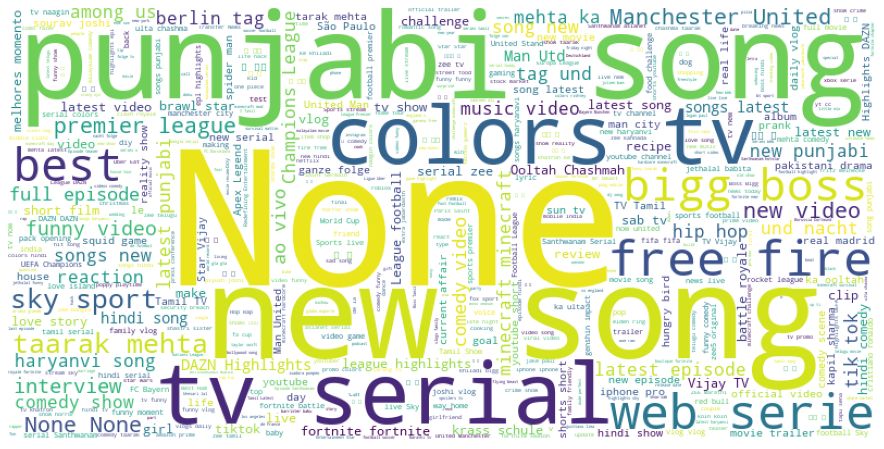

In [34]:
wc_tag = WordCloud( width=800, height=400,max_words=1000, background_color='white').generate(words_tag)

plt.figure(figsize=(16,8))
plt.axis("off")
plt.grid(False)
plt.imshow(wc_tag);

### 4.1 capitalized word

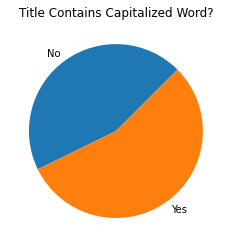

In [35]:
def contains_capitalized_word(s):
    for w in s.split():
        if w.isupper():
            return True
    return False

plt.figure(facecolor='w')
youtube["contains_capitalized"] = youtube["title"].apply(contains_capitalized_word)
value_counts = youtube["contains_capitalized"].value_counts().to_dict()
plt.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'],startangle=45)
plt.title('Title Contains Capitalized Word?')

plt.show()

### 4.1.1 tag_count 와 like 의 상관관계

In [36]:
tags=[x.count("|")+1 for x in youtube["tags"]]
youtube["tag_count"]=tags

In [37]:
youtube.head(3)

,title,publishedAt,channelId,channelTitle,category,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,country,year,contains_capitalized,tag_count
video_id,,,,,,,,,,,,,,,,,,,,
s9FH4rDMvds,LEVEI UM FORA? FINGI ESTAR APAIXONADO POR ELA!,2020-08-11 22:21:49,UCGfBwrCoi9ZJjKiUK8MmJNw,Pietro Guedes,People & Blogs,22,2020-08-12T00:00:00Z,pietro|guedes|ingrid|ohara|pingrid|vlog|amigos...,263835,85095,487,4500,https://i.ytimg.com/vi/s9FH4rDMvds/default.jpg,False,False,"Salve rapaziada, neste vídeo me declarei pra e...",BR,2020,True,14
jbGRowa5tIk,ITZY “Not Shy” M/V TEASER,2020-08-11 15:00:13,UCaO6TYtlC8U5ttz62hTrZgg,JYP Entertainment,Music,10,2020-08-12T00:00:00Z,JYP Entertainment|JYP|ITZY|있지|ITZY Video|ITZY ...,6000070,714310,15176,31040,https://i.ytimg.com/vi/jbGRowa5tIk/default.jpg,False,False,ITZY Not Shy M/V[ITZY Official] https://www.yo...,BR,2020,True,47
3EfkCrXKZNs,Oh Juliana PARÓDIA - MC Niack,2020-08-10 14:59:00,UCoXZmVma073v5G1cW82UKkA,As Irmãs Mota,People & Blogs,22,2020-08-12T00:00:00Z,OH JULIANA PARÓDIA|MC Niack PARÓDIA|PARÓDIAS|A...,2296748,39761,5484,0,https://i.ytimg.com/vi/3EfkCrXKZNs/default.jpg,True,False,Se inscrevam meus amores! 📬 Quer nos mandar al...,BR,2020,True,7


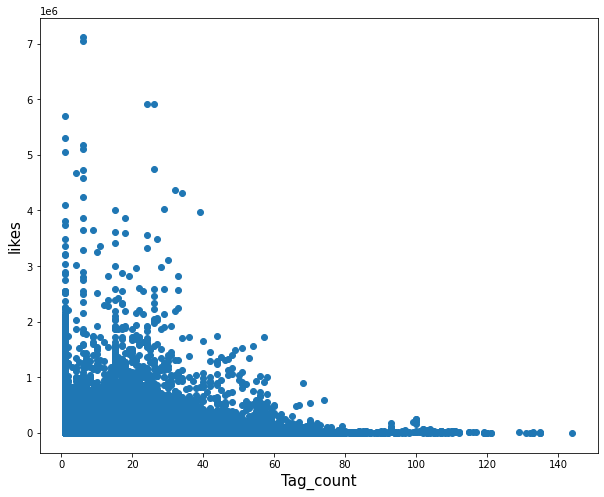

In [38]:
plt.figure(figsize=(10,8))
plt.scatter(youtube['tag_count'],youtube['likes'])
plt.xlabel("Tag_count",size=15)
plt.ylabel("likes",size=15)
plt.show()

### 4.1.2 tag_count와 dislike 의 상관관계

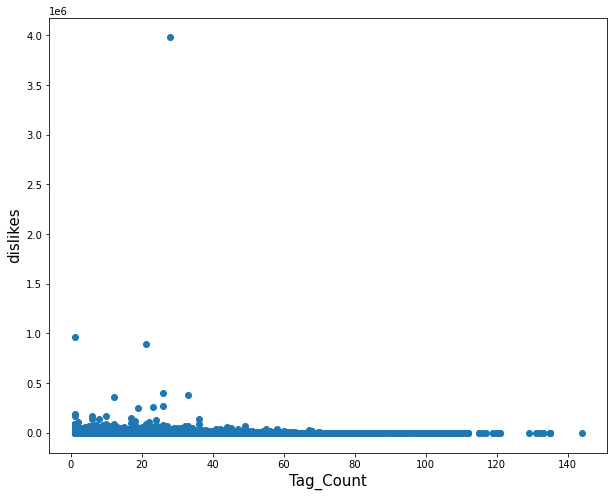

In [39]:
plt.figure(figsize=(10,8))
plt.scatter(youtube['tag_count'],youtube['dislikes'])
plt.xlabel("Tag_Count",size=15)
plt.ylabel("dislikes",size=15)
plt.show()

### 4.1.3 tag_count와 comment_count 와의 상관관계

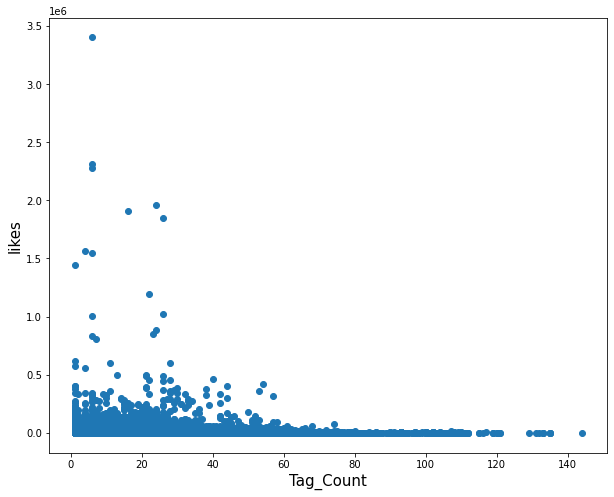

In [40]:
plt.figure(figsize=(10,8))
plt.scatter(youtube['tag_count'],youtube['comment_count'])
plt.xlabel("Tag_Count",size=15)
plt.ylabel("likes",size=15)
plt.show()

### 4.1.4 tag_count와 view_count의 상관관계

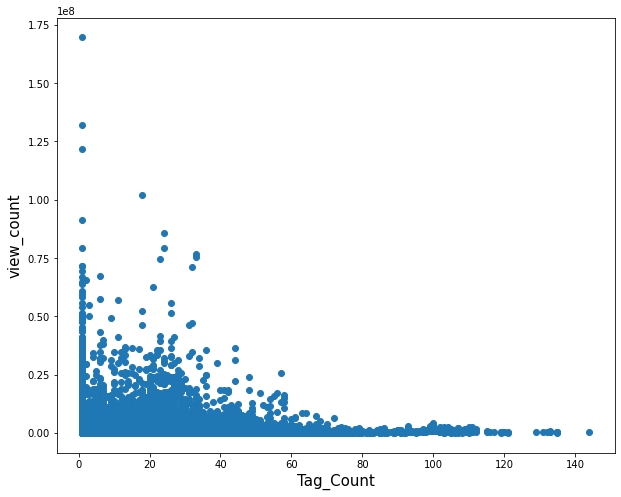

In [41]:
plt.figure(figsize=(10,8))
plt.scatter(youtube['tag_count'],youtube['view_count'])
plt.xlabel("Tag_Count",size=15)
plt.ylabel("view_count",size=15)
plt.show()

## 5. View_count, likes, dislikes, comment_count 

### 5.1 HEATMAP

In [42]:
corr_columns = ["view_count", "likes", "dislikes", "comment_count"]
youtube[corr_columns] = youtube[corr_columns].astype(int)
corr_matrix = youtube[corr_columns].corr()
corr_matrix

,view_count,likes,dislikes,comment_count
view_count,1.000000,0.743622,0.186914,0.340579
likes,0.743622,1.000000,0.149667,0.573809
dislikes,0.186914,0.149667,1.000000,0.143653
comment_count,0.340579,0.573809,0.143653,1.000000


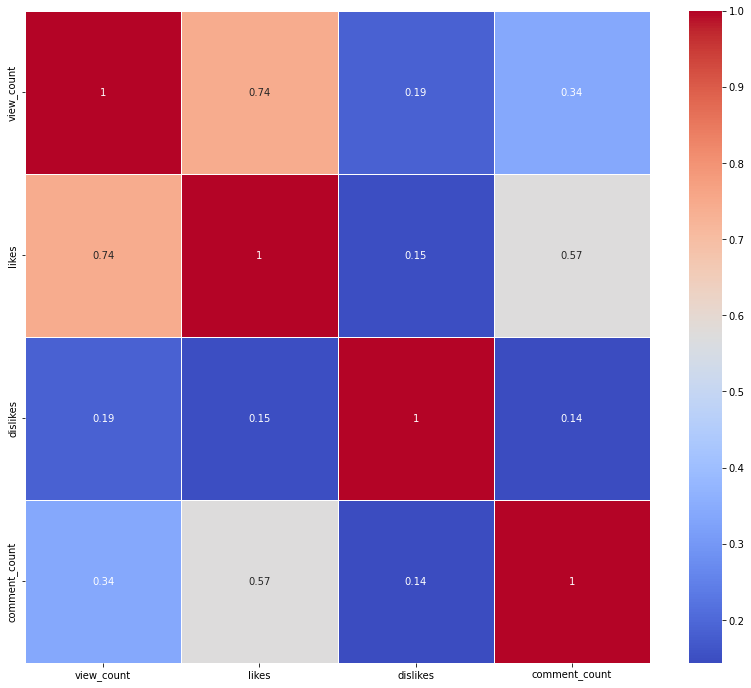

In [43]:
plt.figure(figsize =(14 ,12))
heatmap_YT =sns.heatmap(corr_matrix, linewidths=.5, annot= True, cmap = 'coolwarm')
#ax = sns.heatmap(corr_mtrx, linewidths=.5, annot=True, cmap='coolwarm')

### 5.1.1 view_count and likes 상관관계

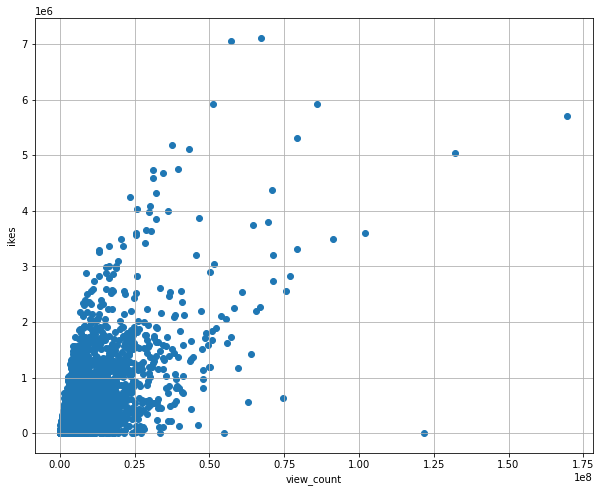

In [44]:
plt.figure(figsize=(10, 8))
plt.grid()
plt.scatter(youtube['view_count'],youtube['likes'])
plt.xlabel('view_count')
plt.ylabel('ikes')
plt.show()

### 5.1.2 view_count and dislikes 상관관계

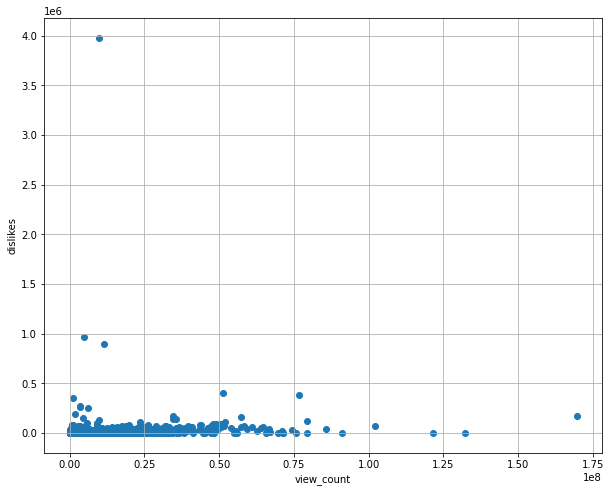

In [45]:
plt.figure(figsize=(10, 8))
plt.grid()
plt.scatter(x = youtube['view_count'],y = youtube['dislikes'])
plt.xlabel('view_count')
plt.ylabel('dislikes')
plt.show()

### 5.1.3 likes and dislikes 상관관계

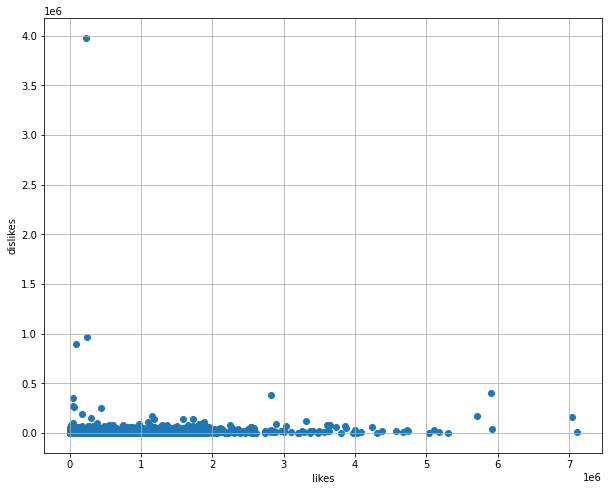

In [46]:
plt.figure(figsize=(10, 8))
plt.grid()
plt.scatter(x = youtube['likes'],y= youtube['dislikes'])
plt.xlabel('likes')
plt.ylabel('dislikes')
plt.show()

### 5.1.4 view_count and comment_count 상관관계

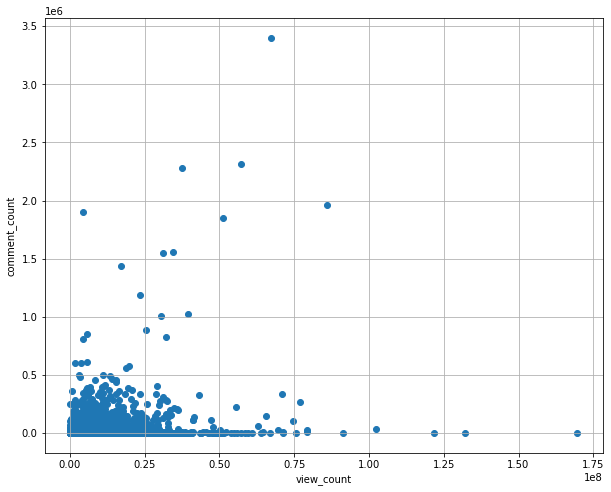

In [47]:
plt.figure(figsize=(10, 8))
plt.grid()
plt.scatter(x= youtube['view_count'],y= youtube['comment_count'])
plt.xlabel('view_count')
plt.ylabel('comment_count')
plt.show()

### 5.1.5 likes and comment_count 상관관계

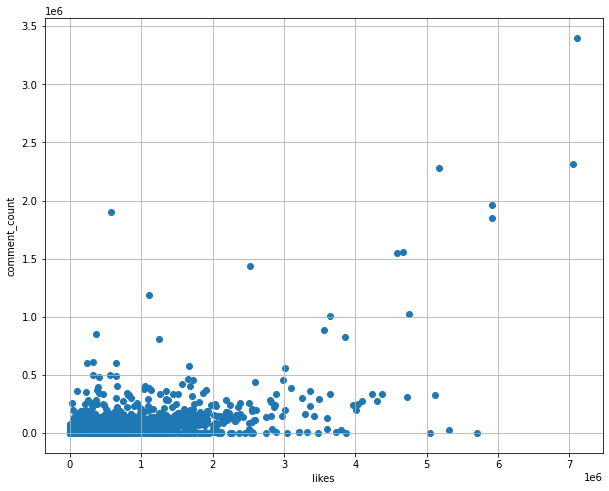

In [48]:
plt.figure(figsize=(10, 8))
plt.grid()
plt.scatter(x = youtube['likes'],y = youtube['comment_count'])
plt.xlabel('likes')
plt.ylabel('comment_count')
plt.show()

### 5.1.6 dislikes and comment_count 상관관계

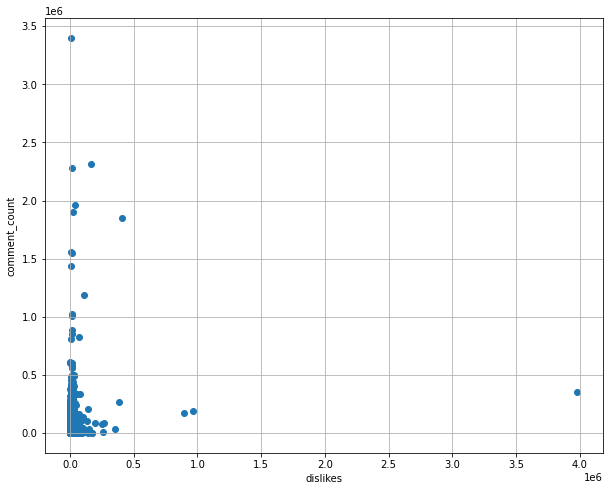

In [49]:
plt.figure(figsize=(10, 8))
plt.grid()
plt.scatter(x = youtube['dislikes'],y = youtube['comment_count'])
plt.xlabel('dislikes')
plt.ylabel('comment_count')
plt.show()

## 6. Title_length

### 6.1 title length 와 상관관계

In [50]:
youtube["title_length"] = youtube["title"].apply(lambda x: len(x))
youtube.head(3)

,title,publishedAt,channelId,channelTitle,category,categoryId,trending_date,tags,view_count,likes,...,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,country,year,contains_capitalized,tag_count,title_length
video_id,,,,,,,,,,,,,,,,,,,,,
s9FH4rDMvds,LEVEI UM FORA? FINGI ESTAR APAIXONADO POR ELA!,2020-08-11 22:21:49,UCGfBwrCoi9ZJjKiUK8MmJNw,Pietro Guedes,People & Blogs,22,2020-08-12T00:00:00Z,pietro|guedes|ingrid|ohara|pingrid|vlog|amigos...,263835,85095,...,4500,https://i.ytimg.com/vi/s9FH4rDMvds/default.jpg,False,False,"Salve rapaziada, neste vídeo me declarei pra e...",BR,2020,True,14,46
jbGRowa5tIk,ITZY “Not Shy” M/V TEASER,2020-08-11 15:00:13,UCaO6TYtlC8U5ttz62hTrZgg,JYP Entertainment,Music,10,2020-08-12T00:00:00Z,JYP Entertainment|JYP|ITZY|있지|ITZY Video|ITZY ...,6000070,714310,...,31040,https://i.ytimg.com/vi/jbGRowa5tIk/default.jpg,False,False,ITZY Not Shy M/V[ITZY Official] https://www.yo...,BR,2020,True,47,25
3EfkCrXKZNs,Oh Juliana PARÓDIA - MC Niack,2020-08-10 14:59:00,UCoXZmVma073v5G1cW82UKkA,As Irmãs Mota,People & Blogs,22,2020-08-12T00:00:00Z,OH JULIANA PARÓDIA|MC Niack PARÓDIA|PARÓDIAS|A...,2296748,39761,...,0,https://i.ytimg.com/vi/3EfkCrXKZNs/default.jpg,True,False,Se inscrevam meus amores! 📬 Quer nos mandar al...,BR,2020,True,7,29


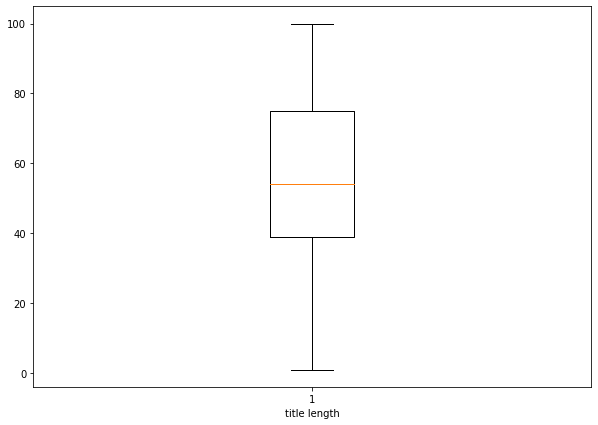

In [51]:
fig = plt.figure(figsize =(10, 7))
plt.boxplot(youtube.title_length)
plt.xlabel("title length")
plt.show()

### 6.1.1 title length vs Numbers of video

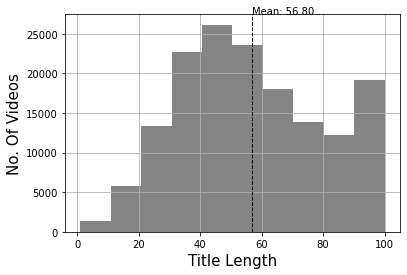

In [52]:
youtube["title_length"]= youtube["title"].apply(lambda x: len(x))

ax=youtube['title_length'].hist(color='#848484')

ax.axvline(youtube['title_length'].mean(), color='k', linestyle='dashed', linewidth=1)

min_ylim, max_ylim = plt.ylim()

ax.text(youtube['title_length'].mean(), max_ylim, 'Mean: {:.2f}'.format(youtube['title_length'].mean()))

plt.xlabel("Title Length",fontsize=15)
plt.ylabel("No. Of Videos",fontsize=15)
plt.show()

### 6.1.2 title_length and likes 상관관계

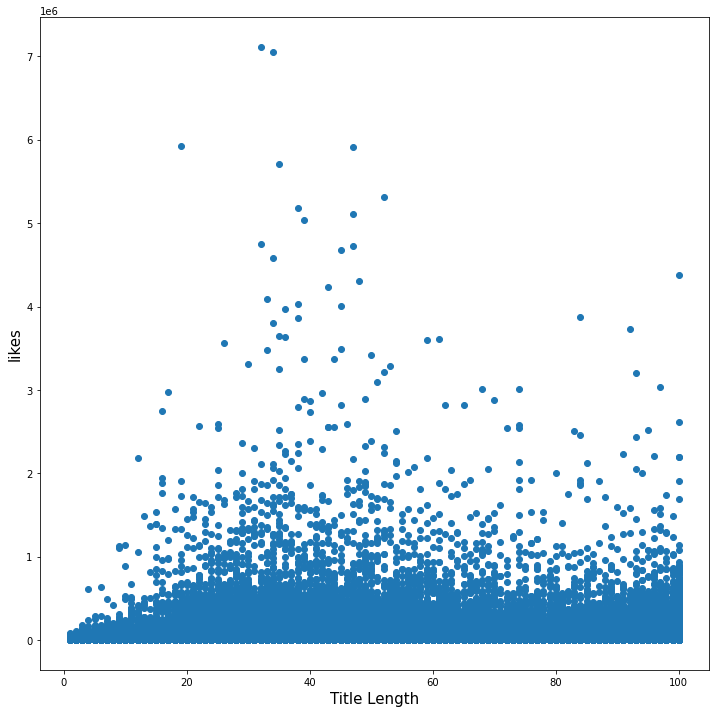

In [53]:
plt.figure(figsize=(12,12))
plt.scatter(youtube['title_length'],youtube['likes'])
plt.xlabel("Title Length",size=15)
plt.ylabel("likes",size=15)
plt.show()

### 6.1.3 title_length and views 상관관계

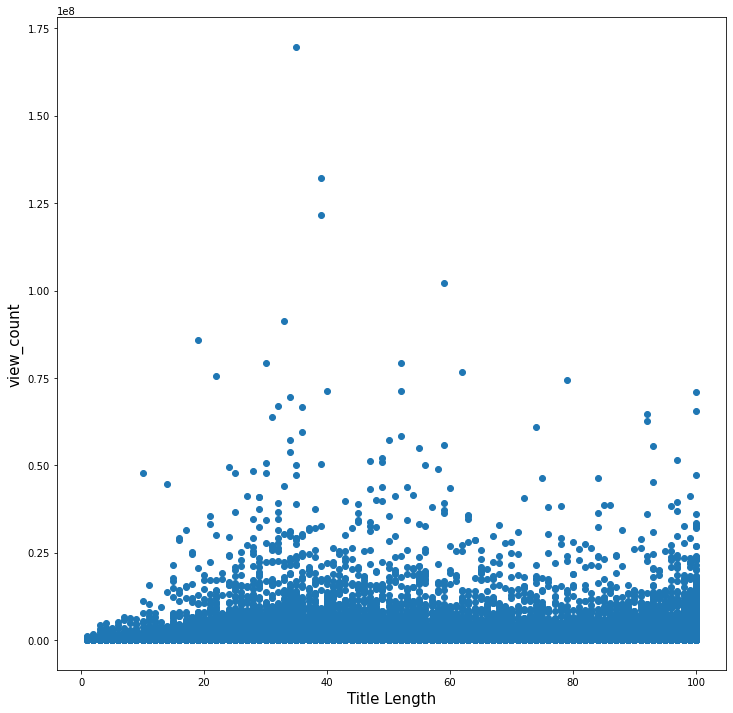

In [54]:
plt.figure(figsize=(12,12))
plt.scatter(youtube['title_length'],youtube['view_count'])
plt.xlabel("Title Length",size=15)
plt.ylabel("view_count",size=15)
plt.show()

### 6.1.4 title length and dislikes 상관관계

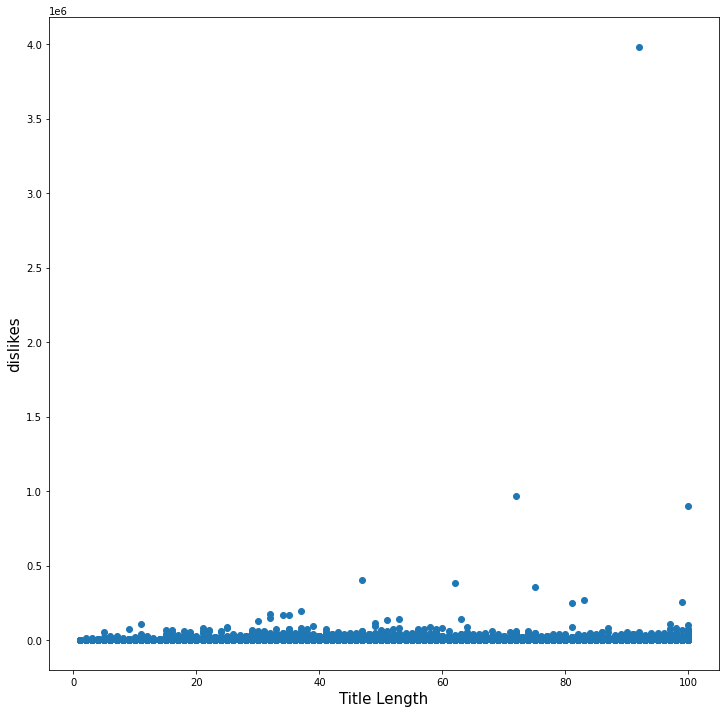

In [55]:
plt.figure(figsize=(12,12))
plt.scatter(youtube['title_length'],youtube['dislikes'])
plt.xlabel("Title Length",size=15)
plt.ylabel("dislikes",size=15)
plt.show()

## 7. Data Cleaning

In [56]:
youtube.head()

,title,publishedAt,channelId,channelTitle,category,categoryId,trending_date,tags,view_count,likes,...,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,country,year,contains_capitalized,tag_count,title_length
video_id,,,,,,,,,,,,,,,,,,,,,
s9FH4rDMvds,LEVEI UM FORA? FINGI ESTAR APAIXONADO POR ELA!,2020-08-11 22:21:49,UCGfBwrCoi9ZJjKiUK8MmJNw,Pietro Guedes,People & Blogs,22,2020-08-12T00:00:00Z,pietro|guedes|ingrid|ohara|pingrid|vlog|amigos...,263835,85095,...,4500,https://i.ytimg.com/vi/s9FH4rDMvds/default.jpg,False,False,"Salve rapaziada, neste vídeo me declarei pra e...",BR,2020,True,14,46
jbGRowa5tIk,ITZY “Not Shy” M/V TEASER,2020-08-11 15:00:13,UCaO6TYtlC8U5ttz62hTrZgg,JYP Entertainment,Music,10,2020-08-12T00:00:00Z,JYP Entertainment|JYP|ITZY|있지|ITZY Video|ITZY ...,6000070,714310,...,31040,https://i.ytimg.com/vi/jbGRowa5tIk/default.jpg,False,False,ITZY Not Shy M/V[ITZY Official] https://www.yo...,BR,2020,True,47,25
3EfkCrXKZNs,Oh Juliana PARÓDIA - MC Niack,2020-08-10 14:59:00,UCoXZmVma073v5G1cW82UKkA,As Irmãs Mota,People & Blogs,22,2020-08-12T00:00:00Z,OH JULIANA PARÓDIA|MC Niack PARÓDIA|PARÓDIAS|A...,2296748,39761,...,0,https://i.ytimg.com/vi/3EfkCrXKZNs/default.jpg,True,False,Se inscrevam meus amores! 📬 Quer nos mandar al...,BR,2020,True,7,29
gBjox7vn3-g,Contos de Runeterra: Targon | A Estrada Tortuosa,2020-08-11 15:00:09,UC6Xqz2pm50gDCORYztqhDpg,League of Legends BR,Gaming,20,2020-08-12T00:00:00Z,Riot|Riot Games|League of Legends|lol|trailer|...,300510,46222,...,2748,https://i.ytimg.com/vi/gBjox7vn3-g/default.jpg,False,False,Você se unirá aos Lunari e aos Solari em Targo...,BR,2020,True,42,48
npoUGx7UW7o,Entrevista com Thammy Miranda | The Noite (10/...,2020-08-11 20:04:02,UCEWOoncsrmirqnFqxer9lmA,The Noite com Danilo Gentili,Comedy,23,2020-08-12T00:00:00Z,The Noite|The Noite com Danilo Gentili|Danilo ...,327235,22059,...,2751,https://i.ytimg.com/vi/npoUGx7UW7o/default.jpg,False,False,Danilo Gentili recebe Thammy Miranda. Após pas...,BR,2020,False,22,52


In [57]:
youtube.drop(['categoryId','thumbnail_link','description', 'comments_disabled', 'ratings_disabled', 'contains_capitalized'],axis=1,inplace=True)
youtube

,title,publishedAt,channelId,channelTitle,category,trending_date,tags,view_count,likes,dislikes,comment_count,country,year,tag_count,title_length
video_id,,,,,,,,,,,,,,,
s9FH4rDMvds,LEVEI UM FORA? FINGI ESTAR APAIXONADO POR ELA!,2020-08-11 22:21:49,UCGfBwrCoi9ZJjKiUK8MmJNw,Pietro Guedes,People & Blogs,2020-08-12T00:00:00Z,pietro|guedes|ingrid|ohara|pingrid|vlog|amigos...,263835,85095,487,4500,BR,2020,14,46
jbGRowa5tIk,ITZY “Not Shy” M/V TEASER,2020-08-11 15:00:13,UCaO6TYtlC8U5ttz62hTrZgg,JYP Entertainment,Music,2020-08-12T00:00:00Z,JYP Entertainment|JYP|ITZY|있지|ITZY Video|ITZY ...,6000070,714310,15176,31040,BR,2020,47,25
3EfkCrXKZNs,Oh Juliana PARÓDIA - MC Niack,2020-08-10 14:59:00,UCoXZmVma073v5G1cW82UKkA,As Irmãs Mota,People & Blogs,2020-08-12T00:00:00Z,OH JULIANA PARÓDIA|MC Niack PARÓDIA|PARÓDIAS|A...,2296748,39761,5484,0,BR,2020,7,29
gBjox7vn3-g,Contos de Runeterra: Targon | A Estrada Tortuosa,2020-08-11 15:00:09,UC6Xqz2pm50gDCORYztqhDpg,League of Legends BR,Gaming,2020-08-12T00:00:00Z,Riot|Riot Games|League of Legends|lol|trailer|...,300510,46222,242,2748,BR,2020,42,48
npoUGx7UW7o,Entrevista com Thammy Miranda | The Noite (10/...,2020-08-11 20:04:02,UCEWOoncsrmirqnFqxer9lmA,The Noite com Danilo Gentili,Comedy,2020-08-12T00:00:00Z,The Noite|The Noite com Danilo Gentili|Danilo ...,327235,22059,3972,2751,BR,2020,22,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14ldT35NK4U,일본회사원들의 퇴근 후 행복,2022-05-06 08:33:27,UCsNfSIKbJ9QBAegU-2BnlXA,오사카에사는사람들TV,People & Blogs,2022-05-09T00:00:00Z,퇴근|규스지|폰즈|일본감성|이자카야|난바|오사카|우라난바|일본포장마차|일본회사원|일...,359327,11435,0,1713,KR,2020,13,15
TwPWzPuKF5I,손흥민 만나려고 5일 기다림.. | 나머지 영국여행 EP3,2022-05-07 05:00:13,UCBDngWGq1RyI4ZZoZPJ-t5A,대빨이형,Travel & Events,2022-05-09T00:00:00Z,[None],117413,3579,0,405,KR,2020,1,32
4fSoC_QX8Xk,[현지반응] 클롭은 매번 손흥민 끌어안고 뭐라는거야? (feat. 파비뉴),2022-05-08 01:51:27,UCmKTwXS5wC4Ww4X6PyXjMYg,서형욱의 뽈리TV,Sports,2022-05-09T00:00:00Z,손흥민클롭|토트넘리버풀|손흥민파비뉴|손흥민골,203810,4322,0,585,KR,2020,4,41


## 8. Machine Lerning

In [143]:
import xgboost

from xgboost import plot_importance
### pre-processing lib
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_predict
### classification lib required
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score

In [144]:
top_50_channel = youtube.channelTitle.value_counts()
top_50_channel = top_50_channel[top_50_channel > 50]
top_50_channel

Vijay Television             883
Colors TV                    819
Sky Sports Football          693
ZEE5                         529
Asianet                      476
                            ... 
Arsenal                       51
DAZN FA Cup & Carabao Cup     51
Netflix                       51
FLA TV                        51
Lucas Studio                  51
Name: channelTitle, Length: 262, dtype: int64

In [145]:
titles=list(top_50_channel.index)
titles

['Vijay Television',
 'Colors TV',
 'Sky Sports Football',
 'ZEE5',
 'Asianet',
 'beIN SPORTS France',
 'Colors Rishtey',
 'ge',
 'Sony SAB',
 'BT Sport',
 'Crazy XYZ',
 'The United Stand',
 'Sourav Joshi Vlogs',
 'NBA',
 'JP Performance',
 'Taarak Mehta Ka Ooltah Chashmah',
 'A Fazenda',
 'Berlin - Tag & Nacht',
 'NFL',
 'MR. INDIAN HACKER',
 'Sky Sport HD',
 'Felipe Neto',
 'RMC Sport',
 'tagesschau',
 'Köln 50667',
 'ESPN Brasil',
 'WWE',
 'Krass Schule - Die jungen Lehrer',
 'Sun TV',
 'Star Maa',
 'Ligue 1 Uber Eats',
 'Fuze III',
 'Flying Beast',
 'T-Series',
 'HugoDécrypte',
 'HAR PAL GEO',
 'SET India',
 'Goal Deutschland',
 'De Placa',
 'SPOTV',
 'Flowers Comedy',
 'BANGTANTV',
 'SQUEEZIE',
 'WebTVBrasileira',
 'FORMULA 1',
 'Michou',
 'DAZN UEFA Champions League',
 'Amixem',
 'CANAL+ Sport',
 'Romain Dot Live',
 'SSundee',
 'Geleia',
 'Techno Gamerz',
 'UTKARSH CLASSES JODHPUR',
 'ARY Digital',
 '워크맨-Workman',
 'FutParódias',
 'Varion',
 'MasterChef Brasil',
 'DAZN Canada',
 

In [146]:
youtube.head()

,title,publishedAt,channelId,channelTitle,category,trending_date,tags,view_count,likes,dislikes,comment_count,country,year,tag_count,title_length
video_id,,,,,,,,,,,,,,,
s9FH4rDMvds,LEVEI UM FORA? FINGI ESTAR APAIXONADO POR ELA!,2020-08-11 22:21:49,UCGfBwrCoi9ZJjKiUK8MmJNw,Pietro Guedes,People & Blogs,2020-08-12T00:00:00Z,pietro|guedes|ingrid|ohara|pingrid|vlog|amigos...,263835,85095,487,4500,BR,2020,14,46
jbGRowa5tIk,ITZY “Not Shy” M/V TEASER,2020-08-11 15:00:13,UCaO6TYtlC8U5ttz62hTrZgg,JYP Entertainment,Music,2020-08-12T00:00:00Z,JYP Entertainment|JYP|ITZY|있지|ITZY Video|ITZY ...,6000070,714310,15176,31040,BR,2020,47,25
3EfkCrXKZNs,Oh Juliana PARÓDIA - MC Niack,2020-08-10 14:59:00,UCoXZmVma073v5G1cW82UKkA,As Irmãs Mota,People & Blogs,2020-08-12T00:00:00Z,OH JULIANA PARÓDIA|MC Niack PARÓDIA|PARÓDIAS|A...,2296748,39761,5484,0,BR,2020,7,29
gBjox7vn3-g,Contos de Runeterra: Targon | A Estrada Tortuosa,2020-08-11 15:00:09,UC6Xqz2pm50gDCORYztqhDpg,League of Legends BR,Gaming,2020-08-12T00:00:00Z,Riot|Riot Games|League of Legends|lol|trailer|...,300510,46222,242,2748,BR,2020,42,48
npoUGx7UW7o,Entrevista com Thammy Miranda | The Noite (10/...,2020-08-11 20:04:02,UCEWOoncsrmirqnFqxer9lmA,The Noite com Danilo Gentili,Comedy,2020-08-12T00:00:00Z,The Noite|The Noite com Danilo Gentili|Danilo ...,327235,22059,3972,2751,BR,2020,22,52


In [147]:
data = youtube[youtube['channelTitle'].isin(titles)]
data = data.reset_index()
data.drop(['video_id','channelId','trending_date','title','tags','publishedAt'],axis=1,inplace=True)
data

,channelTitle,category,view_count,likes,dislikes,comment_count,country,year,tag_count,title_length
0,JYP Entertainment,Music,6000070,714310,15176,31040,BR,2020,47,25
1,MasterChef Brasil,Entertainment,199577,7700,129,874,BR,2020,19,58
2,NFA CHANNEL,Gaming,1123945,129849,1292,746,BR,2020,70,69
3,Renato Garcia,Entertainment,756540,117898,1265,3453,BR,2020,5,52
4,Carol Borba,Sports,70992,18127,69,196,BR,2020,16,61
...,...,...,...,...,...,...,...,...,...,...
27433,짧은대본 ShortPaper,Entertainment,814903,12759,0,1000,KR,2020,18,10
27434,SBS NOW / SBS 공식 채널,Entertainment,1023993,6145,0,2623,KR,2020,39,82
27435,워크맨-Workman,Entertainment,628017,12976,0,643,KR,2020,101,63
27436,스포츠타임,Sports,2400318,22451,0,3527,KR,2020,23,43


In [148]:

le = LabelEncoder()
for i in data.columns:
    if i in ['channelTitle','comments_disabled','ratings_disabled','contains_capitalized','category','country']:
        data[i] = le.fit_transform(data[i])
data

,channelTitle,category,view_count,likes,dislikes,comment_count,country,year,tag_count,title_length
0,91,7,6000070,714310,15176,31040,0,2020,47,25
1,116,3,199577,7700,129,874,0,2020,19,58
2,132,5,1123945,129849,1292,746,0,2020,70,69
3,155,3,756540,117898,1265,3453,0,2020,5,52
4,30,11,70992,18127,69,196,0,2020,16,61
...,...,...,...,...,...,...,...,...,...,...
27433,258,3,814903,12759,0,1000,6,2020,18,10
27434,160,3,1023993,6145,0,2623,6,2020,39,82
27435,253,3,628017,12976,0,643,6,2020,101,63
27436,250,11,2400318,22451,0,3527,6,2020,23,43


In [243]:
X = data.drop('year',axis=1,inplace=True)

KeyError: "['year'] not found in axis"

In [266]:
X=data.drop('likes',axis=1)
y=data.likes

In [267]:
# MAE/MSE 그래프
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error

my_predictions = {}
my_pred = None
my_actual = None
my_name = None

colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive', 
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray', 
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato'
         ]

def plot_predictions(name_, pred, actual):
    df = pd.DataFrame({'prediction': pred, 'actual': y_test})
    df = df.sort_values(by='actual').reset_index(drop=True)

    plt.figure(figsize=(11, 8))
    plt.scatter(df.index, df['prediction'], marker='x', color='r')
    plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
    plt.title(name_, fontsize=15)
    plt.legend(['prediction', 'actual'], fontsize=12)
    plt.show()

def mse_eval(name_, pred, actual):
    global my_predictions, colors, my_pred, my_actual, my_name
    
    my_name = name_
    my_pred = pred
    my_actual = actual

    plot_predictions(name_, pred, actual)

    mse = mean_squared_error(pred, actual)
    my_predictions[name_] = mse

    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'mse'])
    print(df)
    min_ = df['mse'].min() - 10
    max_ = df['mse'].max() + 10
    
    length = len(df) / 2
    
    plt.figure(figsize=(9, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=12)
    bars = ax.barh(np.arange(len(df)), df['mse'], height=0.3)
    
    for i, v in enumerate(df['mse']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=12, fontweight='bold', verticalalignment='center')
        
    plt.title('MSE Error', fontsize=16)
    plt.xlim(min_, max_)
    
    plt.show()
    
def add_model(name_, pred, actual):
    global my_predictions, my_pred, my_actual, my_name
    my_name = name_
    my_pred = pred
    my_actual = actual
    
    mse = mean_squared_error(pred, actual)
    my_predictions[name_] = mse

def remove_model(name_):
    global my_predictions
    try:
        del my_predictions[name_]
    except KeyError:
        return False
    return True    

def plot_all():
    global my_predictions, my_pred, my_actual, my_name
    
    plot_predictions(my_name, my_pred, my_actual)
    
    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'mse'])
    print(df)
    min_ = df['mse'].min() - 10
    max_ = df['mse'].max() + 10
    
    length = len(df) / 2
    
    plt.figure(figsize=(9, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=12)
    bars = ax.barh(np.arange(len(df)), df['mse'], height=0.3)
    
    for i, v in enumerate(df['mse']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=12, fontweight='bold', verticalalignment='center')
        
    plt.title('MSE Error', fontsize=16)
    plt.xlim(min_, max_)
    
    plt.show()

def mae_eval(name_, pred, actual):
    global my_predictions, colors, my_pred, my_actual, my_name
    
    my_name = name_
    my_pred = pred
    my_actual = actual
    plot_predictions(name_, pred, actual)
    mae = mean_absolute_error(pred, actual)
    my_predictions[name_] = mae
    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'mae'])
    print(df)
    min_ = df['mae'].min() - 10
    max_ = df['mae'].max() + 10
    
    length = len(df) / 2
    
    plt.figure(figsize=(9, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=12)
    bars = ax.barh(np.arange(len(df)), df['mae'], height=0.3)
    
    for i, v in enumerate(df['mae']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=12, fontweight='bold', verticalalignment='center')
        
    plt.title('MAE Error', fontsize=16)
    plt.xlim(min_, max_)
    
    plt.show()

def add_model(name_, pred, actual):
    global my_predictions, my_pred, my_actual, my_name
    my_name = name_
    my_pred = pred
    my_actual = actual
    
    mae = mean_absolute_error(pred, actual)
    my_predictions[name_] = mae

def remove_model(name_):
    global my_predictions
    try:
        del my_predictions[name_]
    except KeyError:
        return False
    return True    

def plot_all():
    global my_predictions, my_pred, my_actual, my_name
    
    plot_predictions(my_name, my_pred, my_actual)
    
    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'mae'])
    print(df)
    min_ = df['mae'].min() - 10
    max_ = df['mae'].max() + 10
    
    length = len(df) / 2
    
    plt.figure(figsize=(9, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=12)
    bars = ax.barh(np.arange(len(df)), df['mae'], height=0.3)
    
    for i, v in enumerate(df['mae']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=12, fontweight='bold', verticalalignment='center')
        
    plt.title('MAE Error', fontsize=16)
    plt.xlim(min_, max_)
    
    plt.show()

    
    

In [268]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 40)
print("X_train: ",X_train.shape)
print("X_test: ",X_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

X_train:  (21950, 8)
X_test:  (5488, 8)
y_train:  (21950,)
y_test:  (5488,)


#### 8.1. Linear Regression

In [269]:
linear_model=LinearRegression()
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 40)
linear_model.fit(X_train,y_train)

LinearRegression()

In [270]:
linear_pred = linear_model.predict(X_test)
linear_pred

array([ 31262.56168692, 155166.48443158, 154021.76025286, ...,
       -31873.22962869,   4568.46057174,   7367.82553295])

In [248]:
print("Mean Absolute Error on Training Set: ",mean_absolute_error(y_train,linear_model.predict(X_train)))
print("Mean Absolute Error on Testing Set: ",mean_absolute_error(y_test,linear_pred))
print("R-Squared Score on Training Set: ",r2_score(y_train,linear_model.predict(X_train)))
print("R-Squared Score on Testing Set: ",r2_score(y_test,linear_pred))

Mean Absolute Error on Training Set:  52203.562079253534
Mean Absolute Error on Testing Set:  56490.11419606134
R-Squared Score on Training Set:  0.700990405696979
R-Squared Score on Testing Set:  0.621361141098795


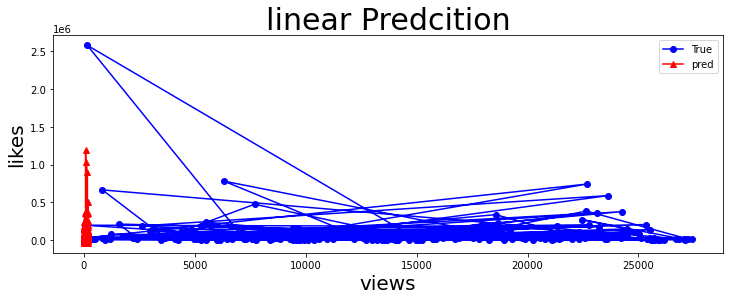

In [271]:
fig = plt.figure(figsize=(12, 4))
chart = fig.add_subplot(1,1,1)
chart.plot(y_test[:200], marker='o', color='blue', label='True')
chart.plot(linear_pred[:200], marker='^', color='red', label='pred')
chart.set_title('linear Predcition', size=30)
plt.xlabel('views', size=20)
plt.ylabel('likes', size=20)
plt.legend(loc = 'best')

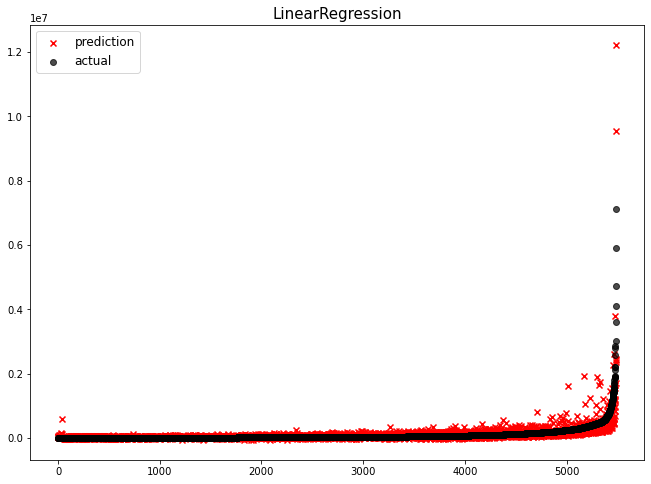

              model           mse
0  LinearRegression  2.215238e+10


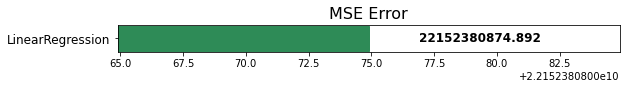

In [272]:
mse_eval('LinearRegression', linear_pred, y_test)

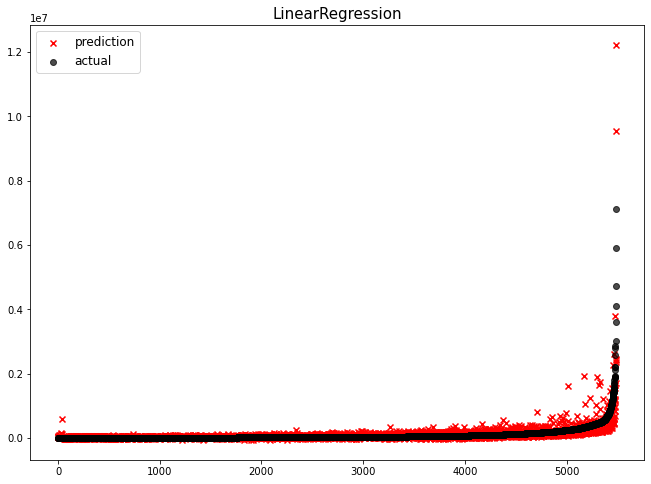

              model           mae
0  LinearRegression  56490.114196


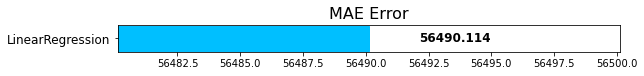

In [273]:
mae_eval('LinearRegression', linear_pred, y_test)

#### 8.2 Random Forest Regressor

In [274]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
X, y = make_regression(n_features=3, n_informative=4,
                       random_state=42, shuffle=False)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 13)

rfr = RandomForestRegressor(max_depth=2, random_state=0)
rfr.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=0)

In [275]:
rfr_pred = rfr.predict(X_test)
rfr_pred

array([149.09865943, -35.39255038,  59.88805215, -90.08337116,
        -3.29616341,  -7.91024788, -58.2721025 , -90.08337116,
       149.09865943,   7.03947807, -14.75662477, -75.62430544,
       -90.39021887,  12.03192747, 143.10500136,  78.25124019,
       -28.55115565,  12.03192747, -28.55115565,  12.03192747])

In [276]:
print("Mean Absolute Error on Training Set: ",mean_absolute_error(y_train,rfr.predict(X_train)))
print("Mean Absolute Error on Testing Set: ",mean_absolute_error(y_test,rfr_pred))
print("R-Squared Score on Training Set: ",r2_score(y_train,rfr.predict(X_train)))
print("R-Squared Score on Testing Set: ",r2_score(y_test,rfr_pred))

Mean Absolute Error on Training Set:  20.92596360621858
Mean Absolute Error on Testing Set:  32.68201919886694
R-Squared Score on Training Set:  0.8744085844675084
R-Squared Score on Testing Set:  0.8269885158117185


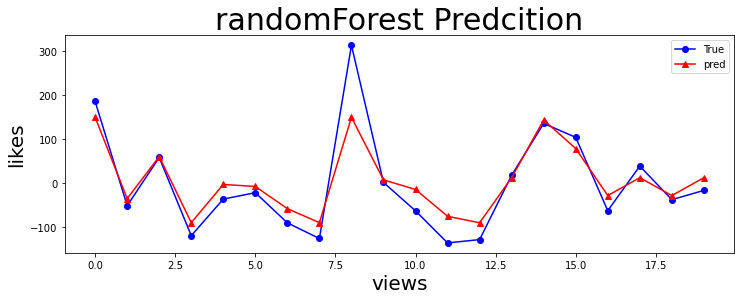

In [277]:
fig = plt.figure(figsize=(12, 4))
chart = fig.add_subplot(1,1,1)
chart.plot(y_test[:200], marker='o', color='blue', label='True')
chart.plot(rfr_pred[:200], marker='^', color='red', label='pred')
chart.set_title('randomForest Predcition', size=30)
plt.xlabel('views', size=20)
plt.ylabel('likes', size=20)
plt.legend(loc = 'best')

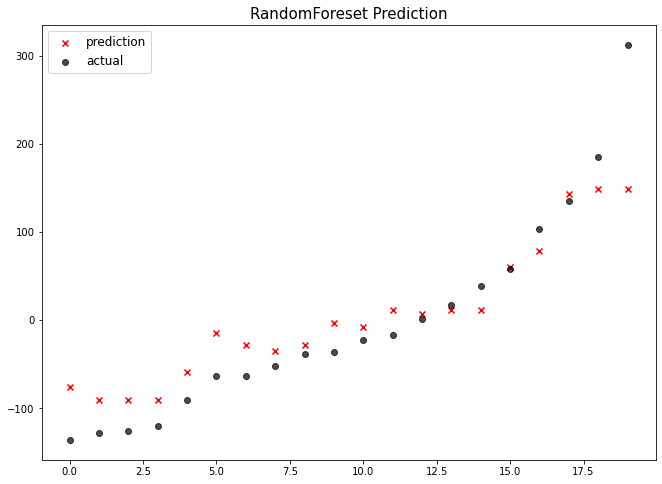

                      model           mse
0          LinearRegression  56490.114196
1  RandomForeset Prediction   2196.168622


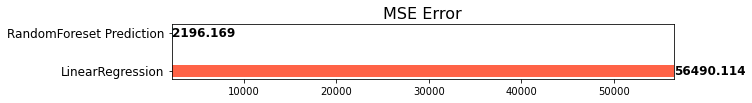

In [261]:
mse_eval('RandomForeset Prediction', rfr_pred, y_test)

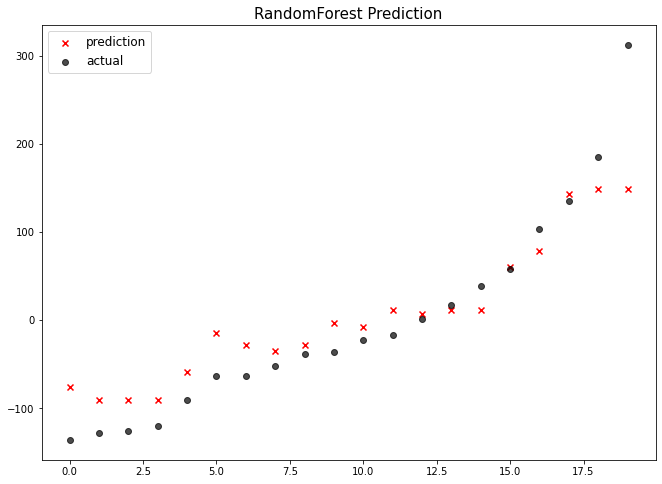

                     model           mae
0         LinearRegression  56490.114196
1  RandomForest Prediction     32.682019


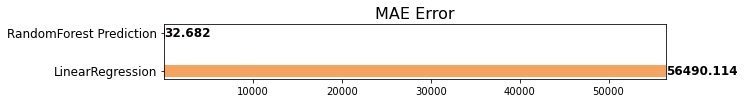

In [278]:
mae_eval('RandomForest Prediction', rfr_pred, y_test)

#### 8.3 XGBRegressor

In [279]:
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.1)
xgb_model = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)

print(len(X_train), len(X_test))
xgb_model.fit(X_train,y_train)

90 10


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.08, max_delta_step=0,
             max_depth=7, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=0.75,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [280]:
xgb_pred = xgb_model.predict(X_test)
xgb_pred

array([  43.330215,  -10.562203,  104.36853 ,  -21.979744,   75.4202  ,
       -119.017235,   13.499032,   62.415573, -120.115036,   10.193845],
      dtype=float32)

In [281]:
print("Mean Absolute Error on Training Set: ",mean_absolute_error(y_train,xgb_model.predict(X_train)))
print("Mean Absolute Error on Testing Set: ",mean_absolute_error(y_test,xgb_pred))
print("R-Squared Score on Training Set: ",r2_score(y_train,xgb_model.predict(X_train)))
print("R-Squared Score on Testing Set: ",r2_score(y_test,xgb_pred))

Mean Absolute Error on Training Set:  0.9802514244755808
Mean Absolute Error on Testing Set:  14.775719037783379
R-Squared Score on Training Set:  0.9995559518743589
R-Squared Score on Testing Set:  0.9476111193431188


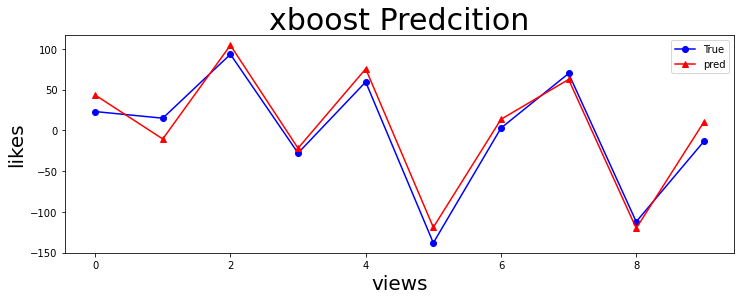

In [282]:
fig = plt.figure(figsize=(12, 4))
chart = fig.add_subplot(1,1,1)
chart.plot(y_test[:200], marker='o', color='blue', label='True')
chart.plot(xgb_pred[:200], marker='^', color='red', label='pred')
chart.set_title('xboost Predcition', size=30)
plt.xlabel('views', size=20)
plt.ylabel('likes', size=20)
plt.legend(loc = 'best')

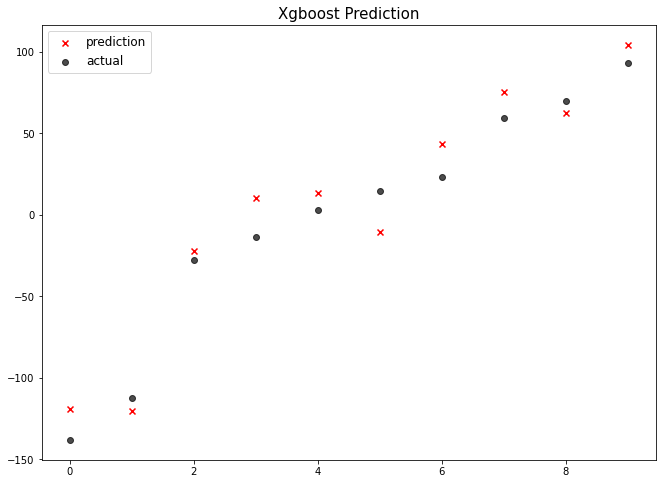

                     model           mse
0         LinearRegression  56490.114196
1       Xgboost Prediction    263.836492
2  RandomForest Prediction     32.682019


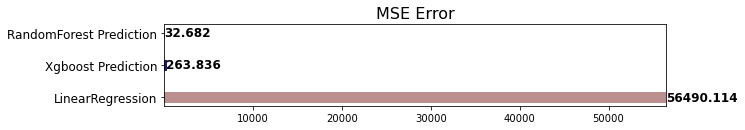

In [283]:
mse_eval('Xgboost Prediction', xgb_pred, y_test)

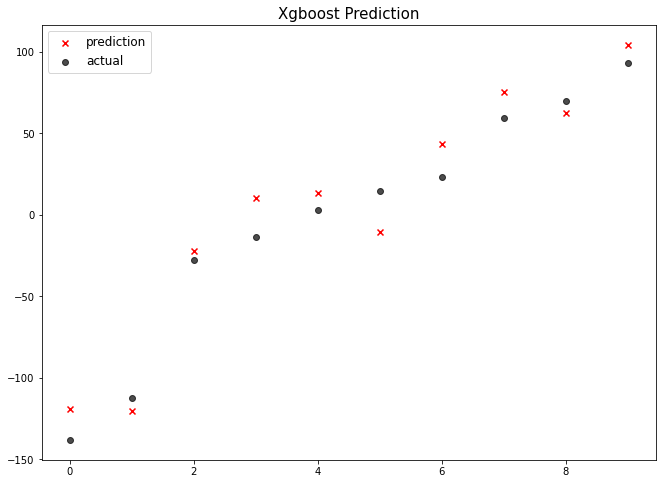

                     model           mae
0         LinearRegression  56490.114196
1  RandomForest Prediction     32.682019
2       Xgboost Prediction     14.775719


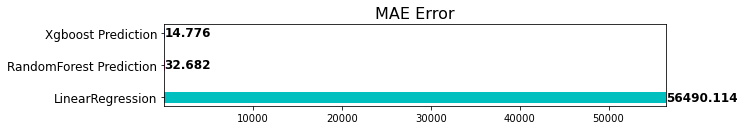

In [284]:
mae_eval('Xgboost Prediction', xgb_pred, y_test)

#### 8.4 LGBMRegressor

In [285]:
import lightgbm as lgb

In [286]:
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.1)
lgb_model = lgb.LGBMRegressor(num_leaves=31, max_depth= 2, learning_rate=0.5,   n_estimators=20)

print(len(X_train), len(X_test))
lgb_model.fit(X_train,y_train)

90 10


LGBMRegressor(learning_rate=0.5, max_depth=2, n_estimators=20)

In [287]:
lgb_pred = lgb_model.predict(X_test)
lgb_pred

array([-120.9624767 ,   25.40099529,  161.34644503,   49.09255052,
         29.94050798,  112.19903221,   -0.75378484,   53.61004324,
        -43.5263281 , -120.9624767 ])

In [288]:
print("Mean Absolute Error on Training Set: ",mean_absolute_error(y_train,xgb_model.predict(X_train)))
print("Mean Absolute Error on Testing Set: ",mean_absolute_error(y_test,lgb_pred))
print("R-Squared Score on Training Set: ",r2_score(y_train,xgb_model.predict(X_train)))
print("R-Squared Score on Testing Set: ",r2_score(y_test,lgb_pred))

Mean Absolute Error on Training Set:  2.4413692477660036
Mean Absolute Error on Testing Set:  20.56102109762599
R-Squared Score on Training Set:  0.9954734696671698
R-Squared Score on Testing Set:  0.8793267080655857


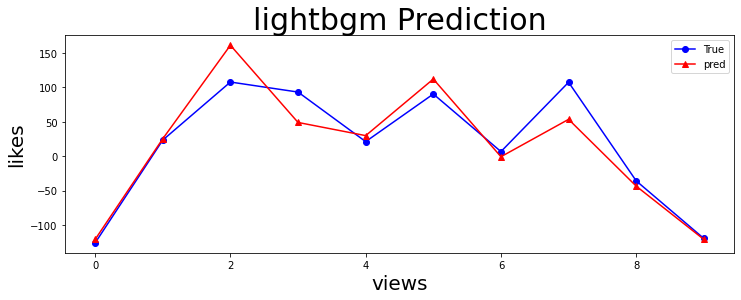

In [289]:
fig = plt.figure(figsize=(12, 4))
chart = fig.add_subplot(1,1,1)
chart.plot(y_test[:200], marker='o', color='blue', label='True')
chart.plot(lgb_pred[:200], marker='^', color='red', label='pred')
chart.set_title('lightbgm Prediction', size=30)
plt.xlabel('views', size=20)
plt.ylabel('likes', size=20)
plt.legend(loc = 'best')

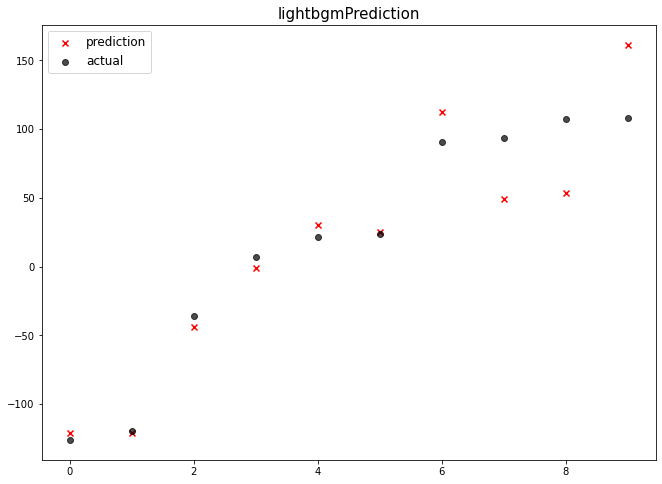

                     model           mse
0         LinearRegression  56490.114196
1       lightbgmPrediction    841.566603
2  RandomForest Prediction     32.682019
3       Xgboost Prediction     14.775719


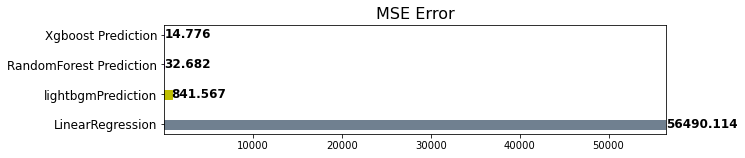

In [290]:
mse_eval('lightbgmPrediction', lgb_pred, y_test)

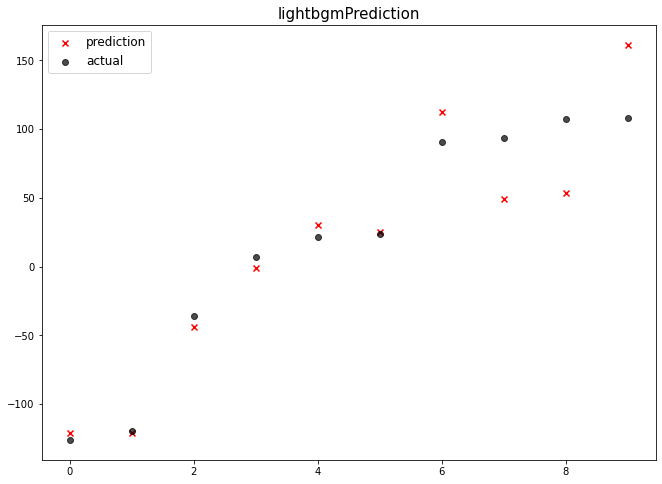

                     model           mae
0         LinearRegression  56490.114196
1  RandomForest Prediction     32.682019
2       lightbgmPrediction     20.561021
3       Xgboost Prediction     14.775719


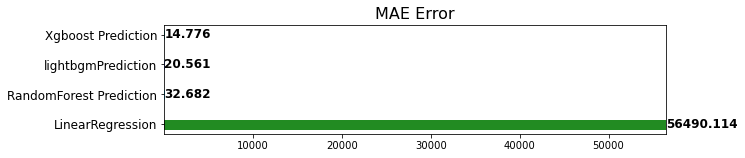

In [291]:
mae_eval('lightbgmPrediction', lgb_pred, y_test)